## 1. Import Required Libraries

In [145]:
import numpy as np
import os
import sys
import json
import random
import time
import math
import re
import pickle
import itertools
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import missingno as msno
from scipy import stats
from scipy.stats import sem
from scipy.stats import skew

plt.rcParams["figure.figsize"]=(8, 6)
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
from collections import Counter

## 2. Problem Statement: Vehicle Insurance Fraud Detection

### Business Problem
Insurance fraud is a significant financial burden for auto insurance companies, leading to:
- Increased premiums for honest policyholders
- Revenue losses due to fraudulent claims

Detecting fraudulent claims **accurately and efficiently** is critical to:
- Minimizing financial losses
- Streamlining legitimate claim processing

---

### Dataset Overview
The dataset (`carclaims`) contains **15,420** auto insurance claim records, described by:
- **32 total features**:
  - **6 ordinal**
  - **25 categorical**
  - **1 target label** (`fraud` or `not-fraud`)

#### Class Imbalance
- Only **923 claims (6%)** are fraudulent
- **14,497 claims (94%)** are legitimate
- This imbalance poses a challenge for training models effectively

---

### Model Objective

Develop a **binary classification model** to predict whether a claim is **fraudulent** or **not-fraudulent**.

The model should:
- Maximize detection of fraud (**high recall**)
- Minimize false positives (**high precision**)
- Effectively handle class imbalance  
  (e.g., via **resampling** or **cost-sensitive algorithms**)

---

### Expected Impact

A robust machine learning-based fraud detection system will:
- Reduce financial losses for insurers
- Lower operational costs via automation
- Improve customer trust with fair and fast claim assessments


## 3. Project Organization

```
Vehicle_Insurance_Fraud_Detection
├── LICENSE            <- Open-source license if one is chosen
├── Makefile           <- Makefile with convenience commands like `make data` or `make train`
├── README.md          <- The top-level README for developers using this project.
├── data
│   ├── external       <- Data from third party sources.
│   ├── interim        <- Intermediate data that has been transformed.
│   ├── processed      <- The final, canonical data sets for modeling.
│   └── raw            <- The original, immutable data dump.
│
├── docs               <- A default mkdocs project; see www.mkdocs.org for details
│
├── models             <- Trained and serialized models, model predictions, or model summaries
│
├── notebooks          <- Jupyter notebooks. Naming convention is a number (for ordering),
│                         the creator's initials, and a short `-` delimited description, e.g.
│                         `1.0-jqp-initial-data-exploration`.
│
├── pyproject.toml     <- Project configuration file with package metadata for 
│                         vehicle_insurance_fraud_detection and configuration for tools like black
│
├── references         <- Data dictionaries, manuals, and all other explanatory materials.
│
├── reports            <- Generated analysis as HTML, PDF, LaTeX, etc.
│   └── figures        <- Generated graphics and figures to be used in reporting
│
├── requirements.txt   <- The requirements file for reproducing the analysis environment, e.g.
│                         generated with `pip freeze > requirements.txt`
│
├── setup.cfg          <- Configuration file for flake8
│
└── vehicle_insurance_fraud_detection   <- Source code for use in this project.
    │
    ├── __init__.py             <- Makes vehicle_insurance_fraud_detection a Python module
    │
    ├── config.py               <- Store useful variables and configuration
    │
    ├── dataset.py              <- Scripts to download or generate data
    │
    ├── features.py             <- Code to create features for modeling
    │
    ├── modeling                
    │   ├── __init__.py 
    │   ├── predict.py          <- Code to run model inference with trained models          
    │   └── train.py            <- Code to train models
    │
    └── plots.py                <- Code to create visualizations
```


## 4. Dataset Overview

In [146]:
# Load the dataset
data = pd.read_csv("vehicle_insurance_fraud_detection.csv")
data

Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Dec            5  Wednesday    Honda        Urban          Tuesday   
1       Jan            3  Wednesday    Honda        Urban           Monday   
2       Oct            5     Friday    Honda        Urban         Thursday   
3       Jun            2   Saturday   Toyota        Rural           Friday   
4       Jan            5     Monday    Honda        Urban          Tuesday   
...     ...          ...        ...      ...          ...              ...   
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
0              Jan                   1  Female        Single  ...   
1              Jan                   4    Male        Single  ...   
2              Nov                   2    Male       Married  ...   
3              Jul                   1    Male       Married  ...   
4              Feb                   2  Female        Single  ...   
...            ...                 ...     ...           ...  ...   
15415          Nov                   5    Male       Married  ...   
15416          Dec                   1    Male       Married  ...   
15417          Dec                   1    Male        Single  ...   
15418          Dec                   2  Female       Married  ...   
15419          Dec                   3    Male        Single  ...   

       AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0               26 to 30                No             No  External   
1               31 to 35               Yes             No  External   
2               41 to 50                No             No  External   
3               51 to 65               Yes             No  External   
4               31 to 35                No             No  External   
...                  ...               ...            ...       ...   
15415           31 to 35                No             No  External   
15416           31 to 35                No             No  External   
15417           26 to 30                No             No  External   
15418           31 to 35                No             No  External   
15419           26 to 30                No             No  External   

      NumberOfSuppliments  AddressChange-Claim  NumberOfCars  Year  \
0                    none               1 year        3 to 4  1994   
1                    none            no change     1 vehicle  1994   
2                    none            no change     1 vehicle  1994   
3             more than 5            no change     1 vehicle  1994   
4                    none            no change     1 vehicle  1994   
...                   ...                  ...           ...   ...   
15415                none            no change     1 vehicle  1996   
15416         more than 5            no change        3 to 4  1996   
15417              1 to 2            no change     1 vehicle  1996   
15418         more than 5            no change     1 vehicle  1996   
15419              1 to 2            no change     1 vehicle  1996   

       BasePolicy FraudFound  
0       Liability         No  
1       Collision         No  
2       Collision         No  
3       Liability         No  
4       Collision         No  
...           ...        ...  
15415   Collision        Yes  
15416   Liability         No  
15417   Collision        Yes  
15418  All Perils         No  
15419   Collision        Yes  

[15420 rows x 33 columns]

In [147]:
# View the names of variable in the data 
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound'],
      dtype='object')

In [148]:
# Check number of duplicated rows
num_duplicates = data.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


In [149]:
# Check the number of unique values in each column
unique_counts = data.nunique()
print("Number of unique values in each column:")
print(unique_counts)


Number of unique values in each column:
Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days:Policy-Accident        5
Days:Policy-Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange-Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3


In [150]:
# Missing value summary
missing_summary = data.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print(missing_summary)

Series([], dtype: int64)


In [151]:
print("Original values before conversion:")
print(data['FraudFound'].unique())  # Should show ['Yes', 'No'] or similar

Original values before conversion:
['No' 'Yes']


In [152]:
print("Sample values:")
print(data['FraudFound'].value_counts(dropna=False))

Sample values:
FraudFound
No     14497
Yes      923
Name: count, dtype: int64


In [153]:
# More robust conversion
data['FraudFound'] = data['FraudFound'].str.strip().str.lower().map({'yes':1, 'no':0})

# Verify
print("\nAfter conversion:")
print(data['FraudFound'].value_counts(normalize=True))


After conversion:
FraudFound
0    0.940143
1    0.059857
Name: proportion, dtype: float64


In [154]:
data.head(10)

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   
5   Oct            4     Friday   Honda        Urban        Wednesday   
6   Feb            1   Saturday   Honda        Urban           Monday   
7   Nov            1     Friday   Honda        Urban          Tuesday   
8   Dec            4   Saturday   Honda        Urban        Wednesday   
9   Apr            3    Tuesday    Ford        Urban        Wednesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
0          Jan                   1  Female        Single  ...   
1          Jan                   4    Male        Single  ...   
2          Nov                   2    Male       Married  ...   
3          Jul                   1    Male       Married  ...   
4          Feb                   2  Female        Single  ...   
5          Nov                   1    Male        Single  ...   
6          Feb                   3    Male       Married  ...   
7          Mar                   4    Male        Single  ...   
8          Dec                   5    Male        Single  ...   
9          Apr                   3    Male       Married  ...   

   AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0           26 to 30                No             No  External   
1           31 to 35               Yes             No  External   
2           41 to 50                No             No  External   
3           51 to 65               Yes             No  External   
4           31 to 35                No             No  External   
5           21 to 25                No             No  External   
6           36 to 40                No             No  External   
7           16 to 17                No             No  External   
8           31 to 35                No            Yes  External   
9           36 to 40                No             No  External   

  NumberOfSuppliments  AddressChange-Claim  NumberOfCars  Year  BasePolicy  \
0                none               1 year        3 to 4  1994   Liability   
1                none            no change     1 vehicle  1994   Collision   
2                none            no change     1 vehicle  1994   Collision   
3         more than 5            no change     1 vehicle  1994   Liability   
4                none            no change     1 vehicle  1994   Collision   
5              3 to 5            no change     1 vehicle  1994   Collision   
6              1 to 2            no change     1 vehicle  1994   Collision   
7                none            no change     1 vehicle  1994   Collision   
8              3 to 5            no change     1 vehicle  1994   Collision   
9              3 to 5            no change     1 vehicle  1994  All Perils   

  FraudFound  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0  
8          0  
9          0  

[10 rows x 33 columns]

In [155]:
# Check numeric features
num_cols = data.select_dtypes(include=['number']).columns.tolist()
num_cols

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year',
 'FraudFound']

In [156]:
# Check categorical features
cat_cols = data.select_dtypes(include='object').columns.tolist()
cat_cols

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days:Policy-Accident',
 'Days:Policy-Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange-Claim',
 'NumberOfCars',
 'BasePolicy']

## 5. Exploratory Data Analysis (EDA)


##### EDA Overviews

In [157]:
# Shape of the dataset
print("Shape of the dataset:", data.shape)
print("Number of Features Available:", data.shape[1])
print("Number of Records Available:", data.shape[0])

Shape of the dataset: (15420, 33)
Number of Features Available: 33
Number of Records Available: 15420


In [158]:
# Data types of each feature
print("Data Types of Each Feature:")
print(data.dtypes)


Data Types of Each Feature:
Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days:Policy-Accident    object
Days:Policy-Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange-Claim     object
NumberOfCars            object
Year                     int64
BasePolicy 

In [159]:
# To check the names of data type and non-null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [160]:
# Check the descriptive satistics of the data.
## The summary of each numerical attribute.
data.describe()

WeekOfMonth  WeekOfMonthClaimed           Age  PolicyNumber  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707   7710.500000   
std        1.287585            1.259115     13.492377   4451.514911   
min        1.000000            1.000000      0.000000      1.000000   
25%        2.000000            2.000000     31.000000   3855.750000   
50%        3.000000            3.000000     38.000000   7710.500000   
75%        4.000000            4.000000     48.000000  11565.250000   
max        5.000000            5.000000     80.000000  15420.000000   

          RepNumber    Deductible  DriverRating          Year    FraudFound  
count  15420.000000  15420.000000  15420.000000  15420.000000  15420.000000  
mean       8.483268    407.704280      2.487808   1994.866472      0.059857  
std        4.599948     43.950998      1.119453      0.803313      0.237230  
min        1.000000    300.000000      1.000000   1994.000000      0.000000  
25%        5.000000    400.000000      1.000000   1994.000000      0.000000  
50%        8.000000    400.000000      2.000000   1995.000000      0.000000  
75%       12.000000    400.000000      3.000000   1996.000000      0.000000  
max       16.000000    700.000000      4.000000   1996.000000      1.000000

In [161]:
# Check the 'AgeOfVehicle' counts

data.AgeOfVehicle.value_counts()


AgeOfVehicle
7 years        5807
more than 7    3981
6 years        3448
5 years        1357
new             373
4 years         229
3 years         152
2 years          73
Name: count, dtype: int64

In [162]:
# Check the 'MaritalStatus' counts
data.MaritalStatus.value_counts()

MaritalStatus
Married     10625
Single       4684
Divorced       76
Widow          35
Name: count, dtype: int64

In [163]:
# Class Verification
print("="*50)
print("Class Verification")
print("="*50)
print(f"Total samples: {len(data)}")
print(f"Number of classes: {data['FraudFound'].nunique()}")
print("\nClass labels:", data['FraudFound'].unique())


Class Verification
Total samples: 15420
Number of classes: 2

Class labels: [0 1]


##### Visualize Class Distribution (Target)

In [164]:
# Class Distribution - Numerical
class_dist = data['FraudFound'].value_counts().reset_index()
class_dist.columns = ['FraudFound', 'Count']
class_dist['Percentage'] = (class_dist['Count'] / len(data)) * 100
print("\n" + "="*50)
print("Class Distribution")
print("="*50)
print(class_dist.to_string(index=False))


Class Distribution
 FraudFound  Count  Percentage
          0  14497   94.014267
          1    923    5.985733


#### Only 6% of Claims are detected as Fraud and since this is the target feature, shows the dataset is extremely imbalanced

##### Visualize Class Distribution (Target)

FraudFound
0    14497
1      923
Name: count, dtype: int64


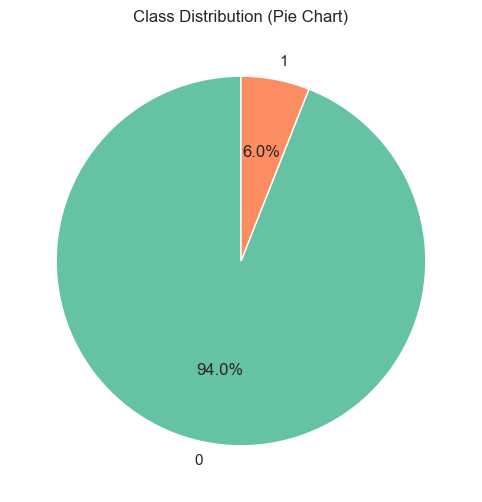

In [165]:
# Visualize Class Distribution (Target)
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
sns.countplot(data=data, x='FraudFound')
plt.title("Class Distribution")
plt.show()

# Value counts
print(data['FraudFound'].value_counts())

# Visualize Class Distribution (Target) as a Pie Chart
plt.figure(figsize=(8, 6))
data['FraudFound'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title("Class Distribution (Pie Chart)")
plt.ylabel('')
plt.show()  

##### Missing Value Visualization

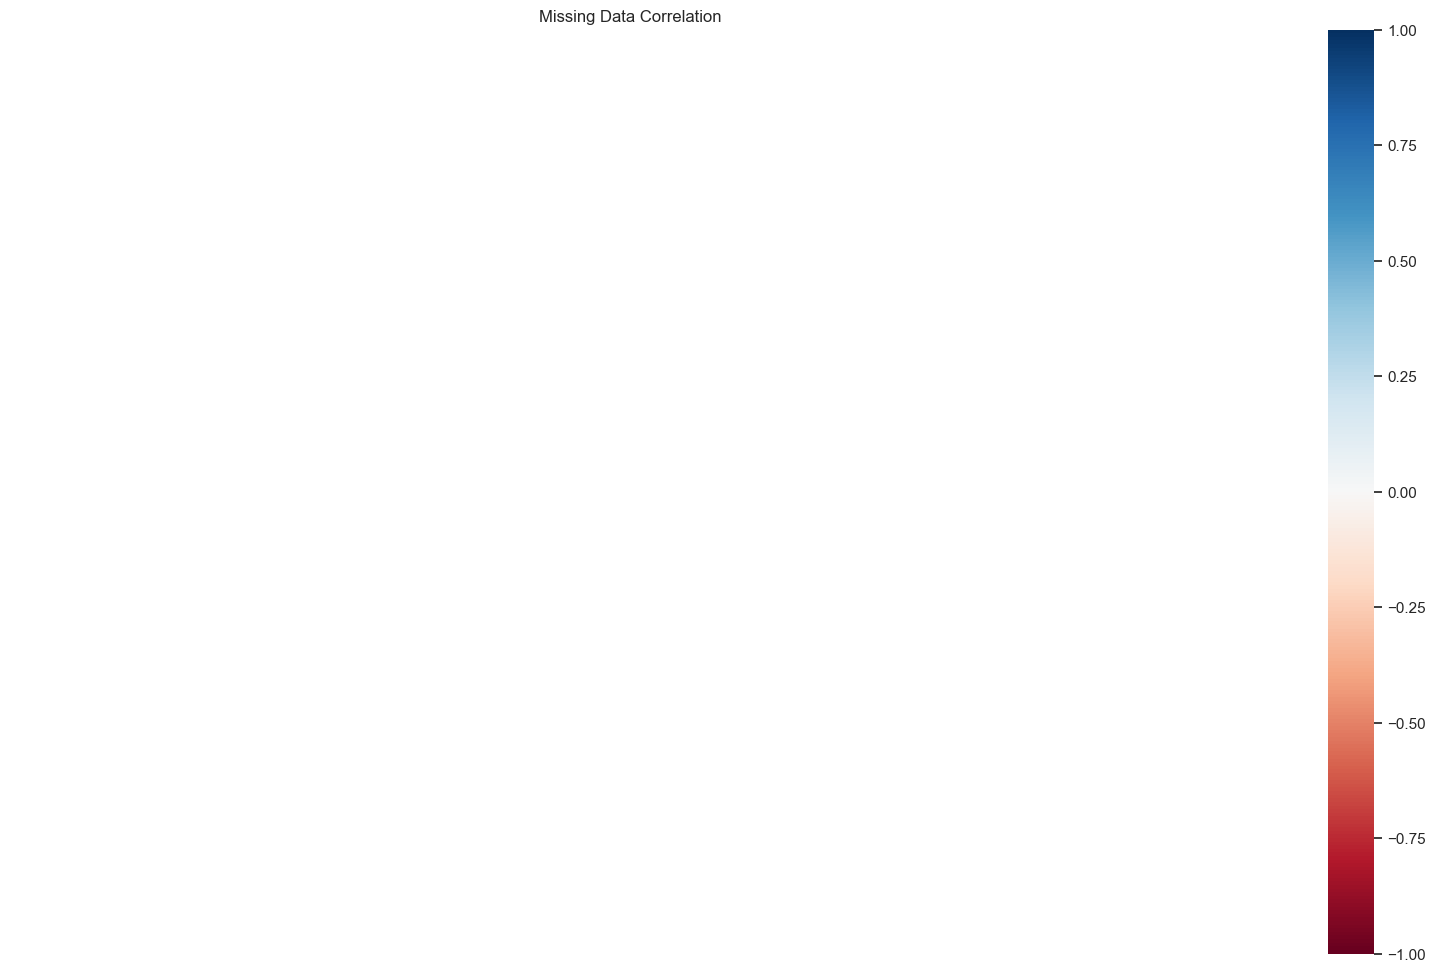

In [166]:
# Missing Value Visualization
import missingno as msno

# Bar plot of missing values
msno.bar(data)
plt.title("Missing Values by Column")
plt.show()

# Heatmap to detect patterns
msno.heatmap(data)
plt.title("Missing Data Correlation")
plt.show()


##### Distribution of Numerical Features (Histogram of each numerical feature)

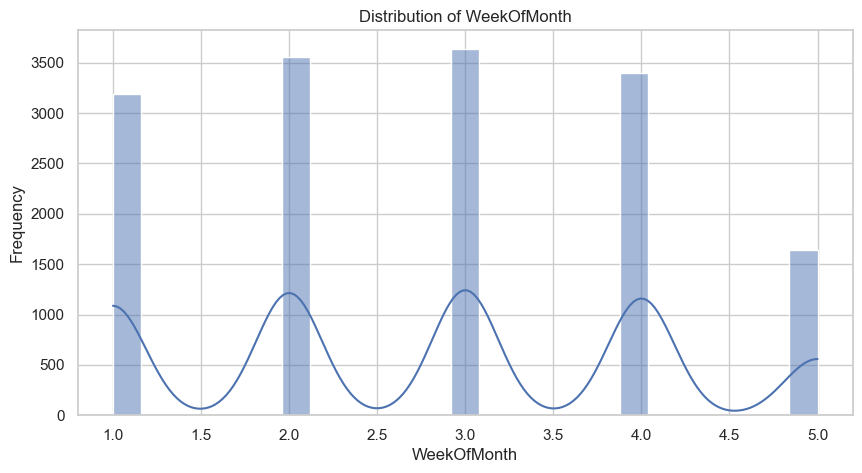

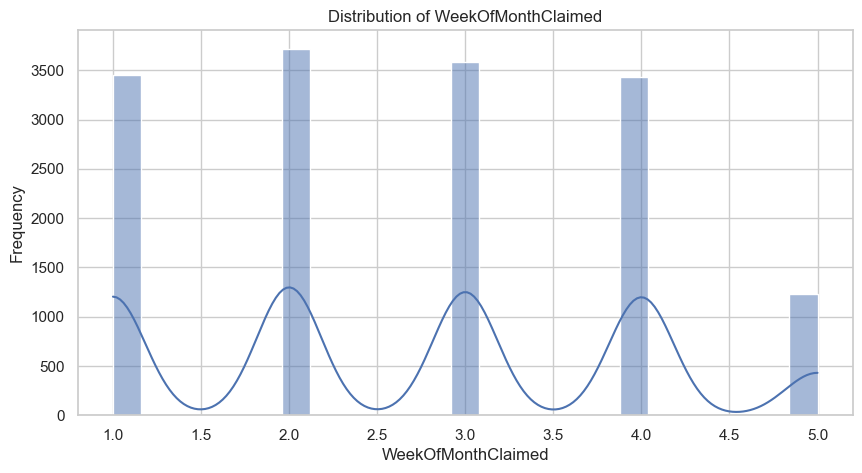

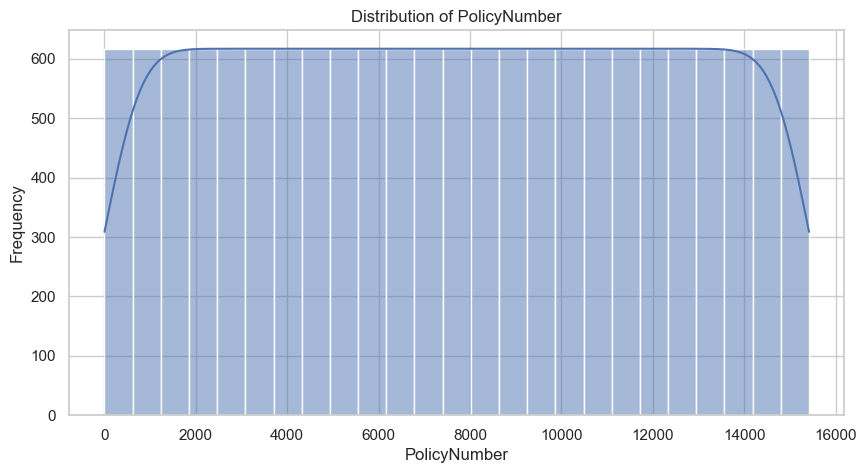

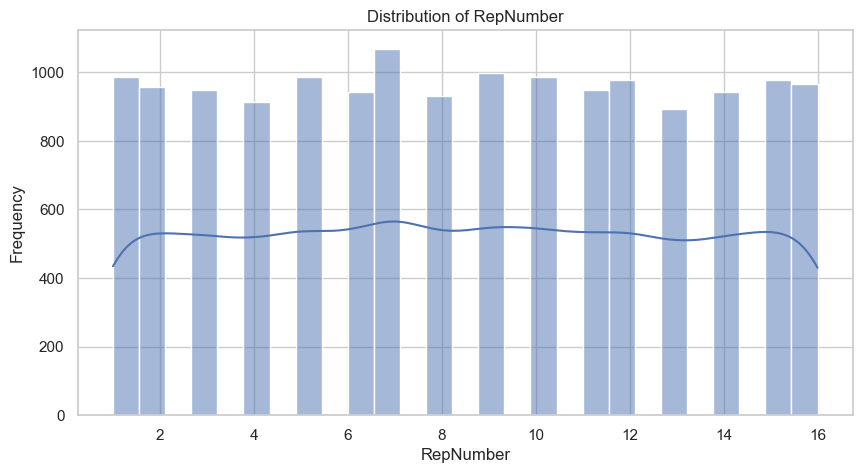

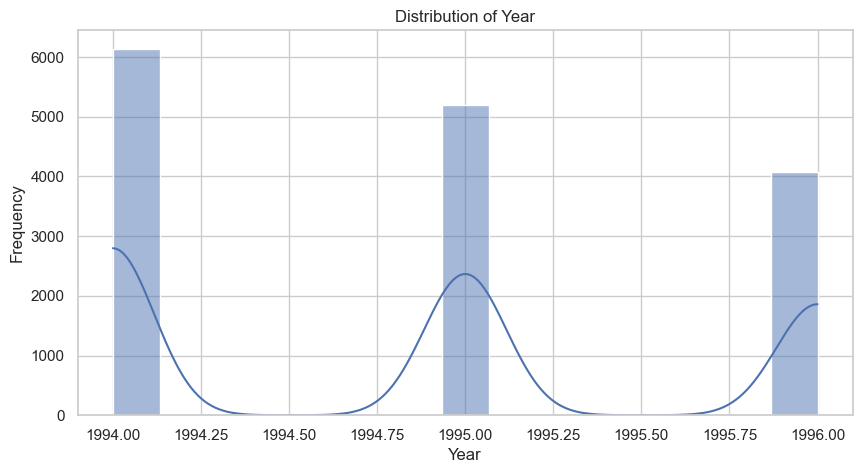

In [167]:
#check the distribution of each numerical feature
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

##### Plots Categorical Features Count 

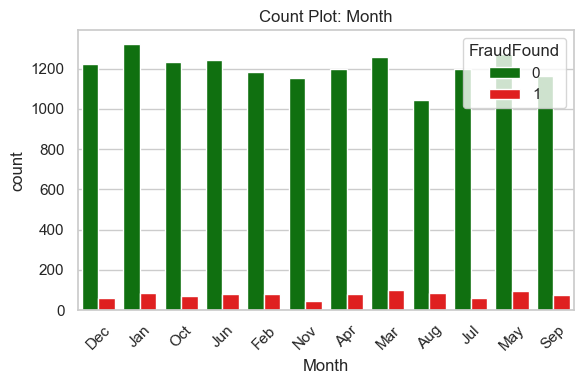

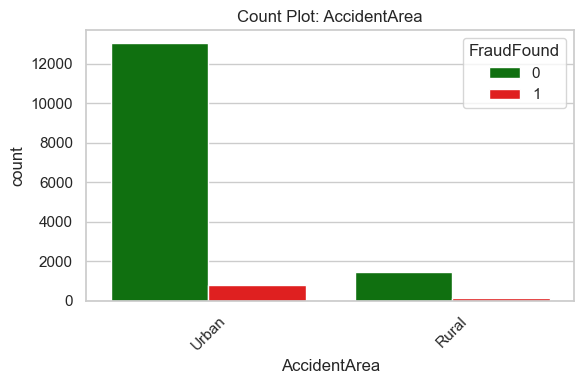

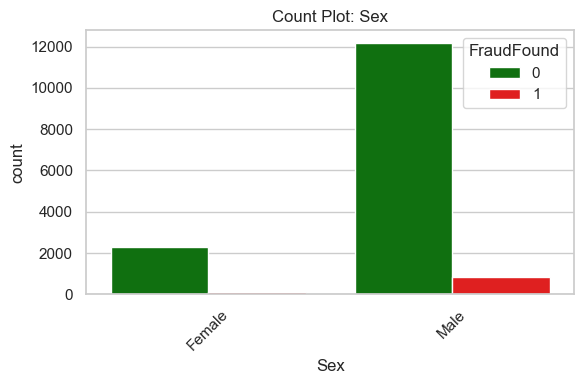

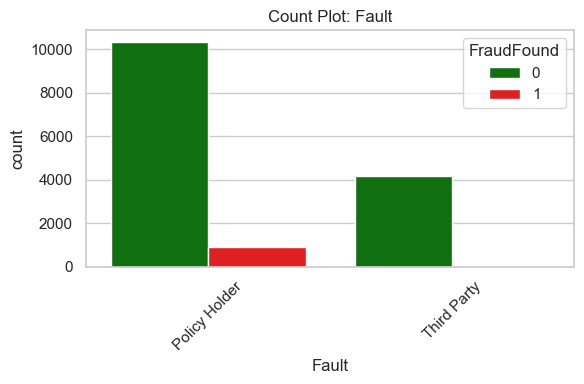

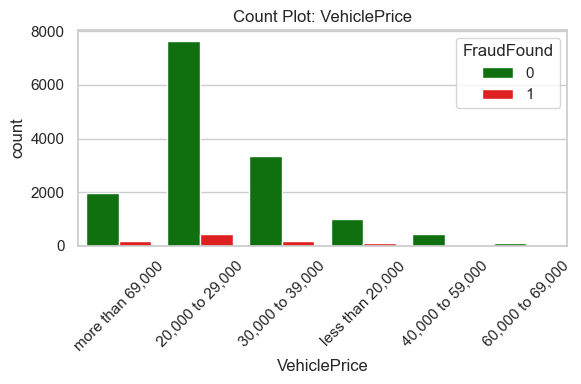

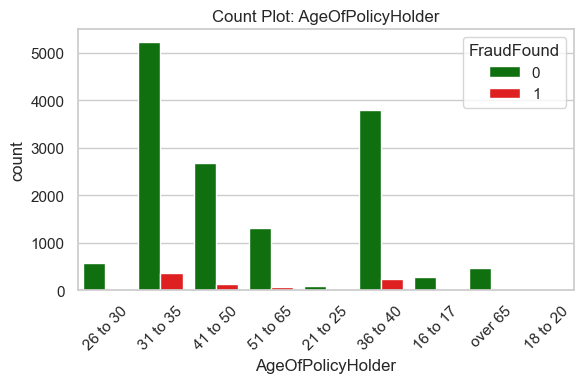

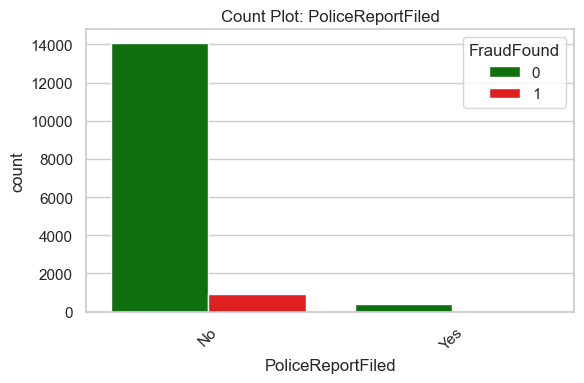

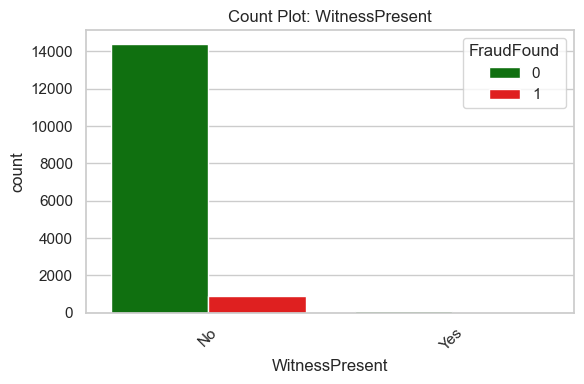

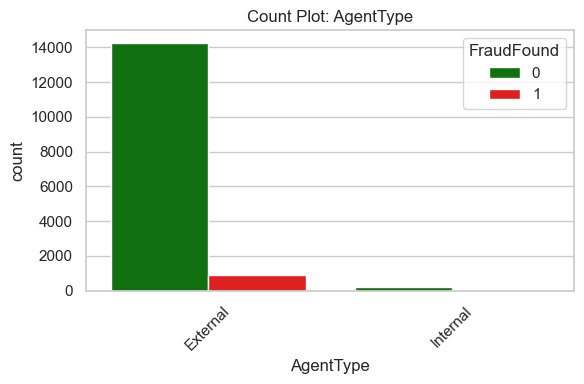

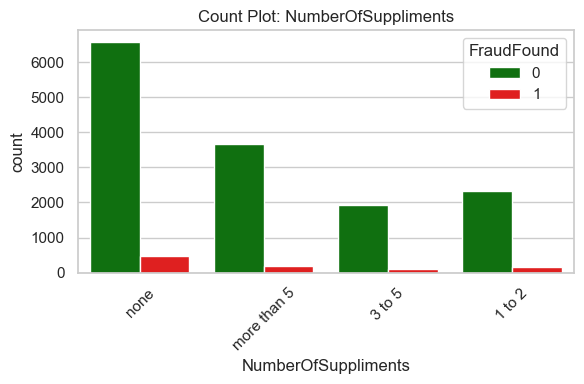

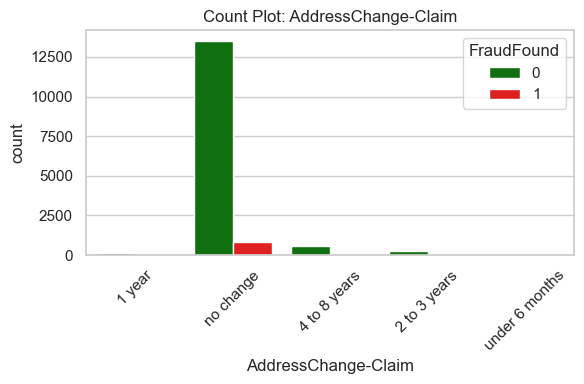

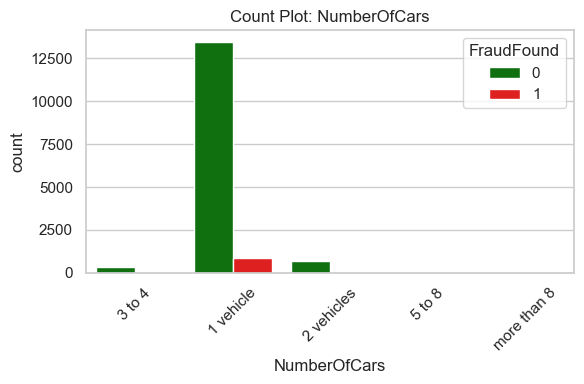

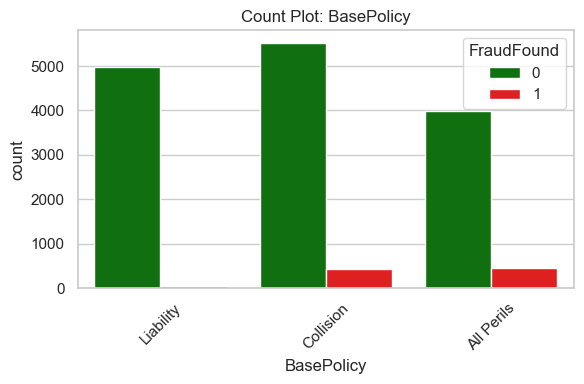

In [168]:
# Categorical Features Count Plots
cat_cols = data.select_dtypes(include='object').columns.tolist()

# Remove 'FraudFound' safely (if present)
if 'FraudFound' in cat_cols:
    cat_cols.remove('FraudFound')

# Plot counts for each categorical feature
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=col, hue='FraudFound', palette={1: 'red', 0: 'green'})
    plt.title(f'Count Plot: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### Correlation Heatmap (Numeric Only)

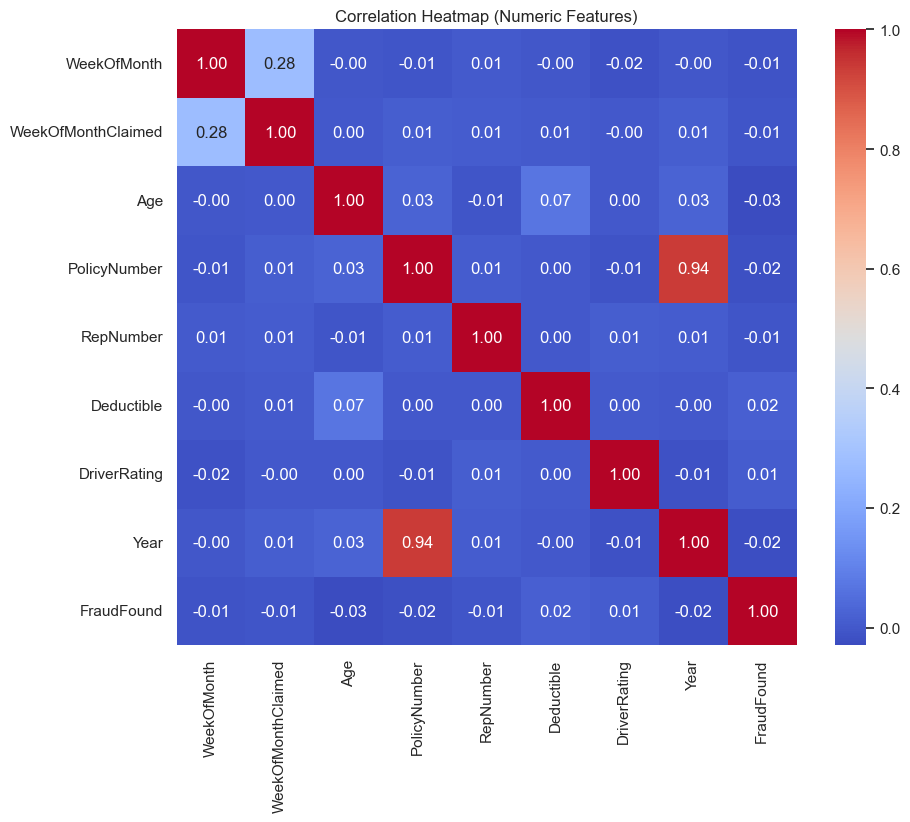

In [169]:
# Numeric columns
num_cols = data.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = num_cols.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


Observations from the Correlation Heatmap

1. **High Correlation Between Features:**

PolicyNumber and Year have a very strong positive correlation (0.94).

Implication: These features likely encode similar information (e.g., policy numbers may be assigned incrementally over years).

Action: Keeping both may introduce redundancy without improving prediction.

2. **Weak Correlation with Target (FraudFound):**

All features show near-zero correlation (|r| ≤ 0.03) with fraud.

Confirms earlier finding that no numeric feature is strongly predictive of fraud on its own.

3. **Other Notable Correlations:**

WeekOfMonth and WeekOfMonthClaimed: moderate correlation (0.28), but not strong enough to cause multicollinearity (confirmed by low VIF).

Age and Deductible: slight correlation (0.07), which is negligible.

##### Correlation Matrix

In [170]:
# Correlation matrix with the Class
num_cols = data.select_dtypes(include=["number"]).columns
corr_matrix = data[num_cols].corr()
print(corr_matrix["FraudFound"].sort_values(ascending=False))


FraudFound            1.000000
Deductible            0.017348
DriverRating          0.007266
WeekOfMonthClaimed   -0.005761
RepNumber            -0.007551
WeekOfMonth          -0.011861
PolicyNumber         -0.020345
Year                 -0.024760
Age                  -0.029741
Name: FraudFound, dtype: float64


##### Check Multicollinearity

In [171]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Identify numeric columns in your DataFrame
numeric_cols = data.select_dtypes(include="number").columns.tolist()

# Create a numeric-only DataFrame
df_num = data[numeric_cols]

# Drop the target column from the features
X = df_num.drop(columns="FraudFound")

# Add constant for VIF calculation
X_const = add_constant(X)

# Compute VIF for each feature
vif_df = pd.DataFrame({
    "feature": X_const.columns,
    "VIF": [variance_inflation_factor(X_const.values, i)
            for i in range(X_const.shape[1])]
})
print(vif_df)


              feature           VIF
0               const  5.011027e+07
1         WeekOfMonth  1.082704e+00
2  WeekOfMonthClaimed  1.082440e+00
3                 Age  1.005608e+00
4        PolicyNumber  8.136141e+00
5           RepNumber  1.000355e+00
6          Deductible  1.004999e+00
7        DriverRating  1.000649e+00
8                Year  8.135786e+00


Findings:

low VIF (close to 1), indicating no severe multicollinearity issues.

VIF < 5 is generally acceptable.

VIF > 10 indicates serious multicollinearity.

None of the features indicates serious multicollinearity.

PolicyNumber and Year have VIF ~8.1, suggesting some redundancy.

const (intercept term) has an extremely high VIF, but this is expected and can be ignored.

##### Check if the dataset is balance or imbalance

In [172]:
# Balance Check: To check if the dataset is balance or imbalance
imbalance_ratio = class_dist['Count'].max() / class_dist['Count'].min()
print("\n" + "="*50)
print("Balance Check")
print("="*50)
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")
print("Interpretation:")
print("- Ratio close to 1:1 indicates balanced data")
print(f"- Your data is {'balanced' if imbalance_ratio < 1.5 else 'moderately imbalanced'}")



Balance Check
Imbalance ratio: 15.71:1
Interpretation:
- Ratio close to 1:1 indicates balanced data
- Your data is moderately imbalanced


Findings: 

The dataset is moderately imbalanced, meaning fraudulent cases (minority class) are significantly underrepresented compared to non-fraudulent cases (majority class).

### 5.1 EDA Summary

#### Class Imbalance

- **Imbalance Ratio:** 15.71:1 → For every 1 fraudulent claim, there are ~16 legitimate ones.
- **Implication:**  
  The dataset is **moderately imbalanced**, which may bias models toward the majority class.
- **Action:**  
  Mitigation strategies such as **resampling** (e.g., SMOTE, undersampling) or **cost-sensitive learning** should be considered to improve fraud detection.

---

#### Multicollinearity Check (VIF)

- Most features have **VIF < 5**, indicating low multicollinearity.
- **Exceptions:**
  - `PolicyNumber` and `Year` have **VIF > 8**, suggesting potential multicollinearity or being identifier-like features.
  - The **intercept term (`const`)** has a **very high VIF (~50 million)** — this is expected and can be safely ignored.
- **Action:**  
  Consider removing or transforming `PolicyNumber` and `Year` if they do not carry predictive value.

---

#### Correlation with Target (`FraudFound`)

- All numeric features show **very weak correlation** with the target:
  - Highest: `Deductible` (0.0173) — still negligible.
  - Others are near zero or slightly negative.
- **Implication:**  
  - There's no strong **linear** relationship between numeric features and the target.
  - This highlights the need for:
    - **Non-linear models** (e.g., tree-based models, ensembles),
    - **Feature engineering** (interactions, transformations),
    - Emphasis on **categorical variables**, which may carry more predictive signal.


#### Drop Irrelevant Features

In [173]:
def drop_irrelevant_features(data, id_threshold=0.9, verbose=True):
    rows = data.shape[0]
    drop_cols = []

    for col in data.columns:
        unique_vals = data[col].nunique()

        # Drop if all values are the same (constant feature)
        if unique_vals == 1:
            drop_cols.append(col)
            if verbose:
                print(f"Dropping '{col}': Only one unique value")

        # Drop if high-cardinality potential ID column
        elif unique_vals / rows >= id_threshold:
            drop_cols.append(col)
            if verbose:
                print(f"Dropping '{col}': High cardinality ({unique_vals} unique values)")

    data = data.drop(columns=drop_cols)
    return data

In [174]:
cleaned_data = drop_irrelevant_features(data)

# Check the cleaned data
print("Cleaned Data Shape:", cleaned_data.shape)
print("Remaining Columns:", cleaned_data.columns.tolist())

Dropping 'PolicyNumber': High cardinality (15420 unique values)
Cleaned Data Shape: (15420, 32)
Remaining Columns: ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year', 'BasePolicy', 'FraudFound']


##### Outliers Detection Using IQR 

In [175]:
# Check numeric features
num_cols = cleaned_data.select_dtypes(include=['number']).columns.tolist()
num_cols

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year',
 'FraudFound']

In [176]:
# Use IQR method on selected numeric features for outlier detection
outlier_features = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'RepNumber', 'Deductible', 'DriverRating', 'Year', 'FraudFound']
for feature in outlier_features:
    q1 = cleaned_data[feature].quantile(0.25)
    q3 = cleaned_data[feature].quantile(0.75)
    iqr = q3 - q1
    
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    outliers = cleaned_data[(cleaned_data[feature] < lower) | (cleaned_data[feature] > upper)]
    print(f"\n{feature}: {len(outliers)} outliers")
    
    # target column is 'FraudFound'
    if 'FraudFound' in cleaned_data.columns:
        print(outliers['FraudFound'].value_counts())




WeekOfMonth: 0 outliers
Series([], Name: count, dtype: int64)

WeekOfMonthClaimed: 0 outliers
Series([], Name: count, dtype: int64)

Age: 547 outliers
FraudFound
0    507
1     40
Name: count, dtype: int64

RepNumber: 0 outliers
Series([], Name: count, dtype: int64)

Deductible: 582 outliers
FraudFound
0    515
1     67
Name: count, dtype: int64

DriverRating: 0 outliers
Series([], Name: count, dtype: int64)

Year: 0 outliers
Series([], Name: count, dtype: int64)

FraudFound: 923 outliers
FraudFound
1    923
Name: count, dtype: int64


##### Outliers detection using Boxplot

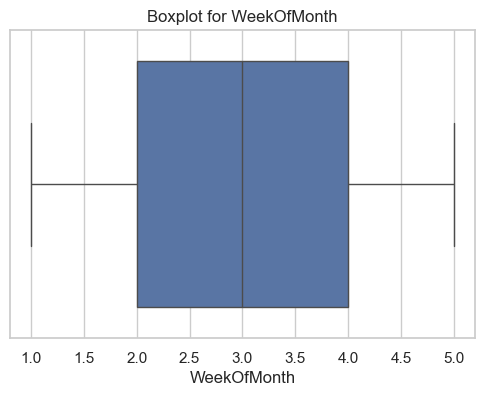

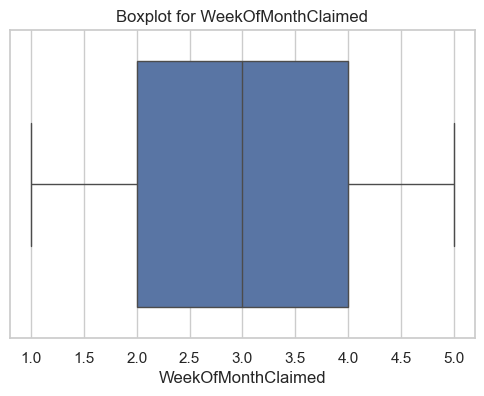

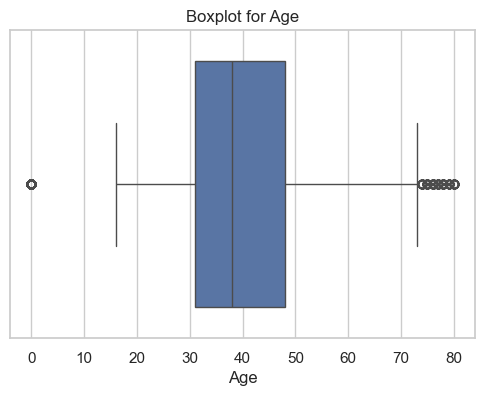

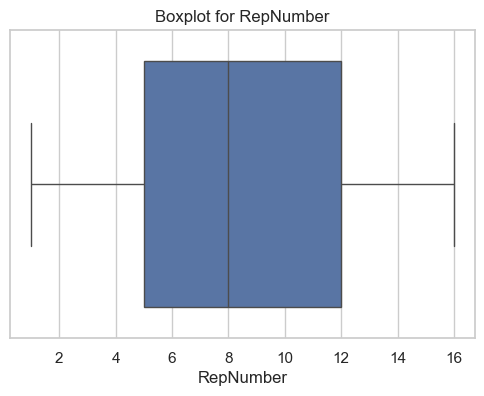

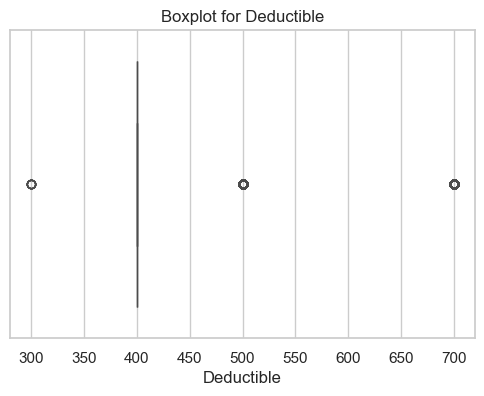

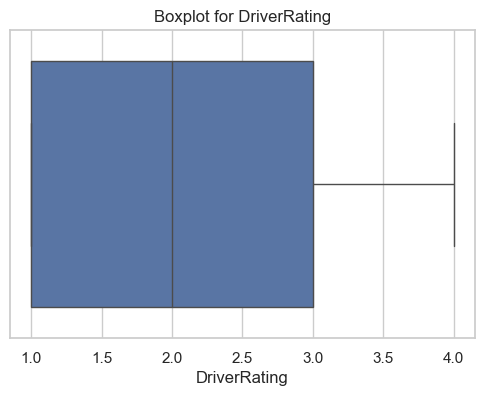

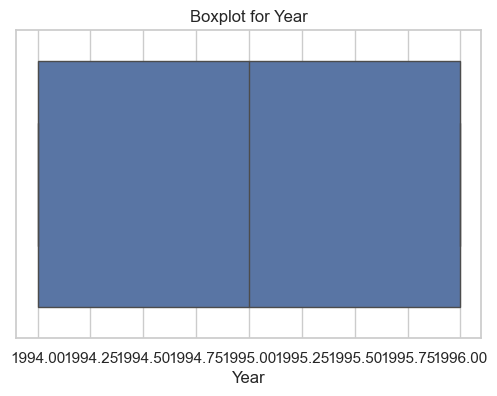

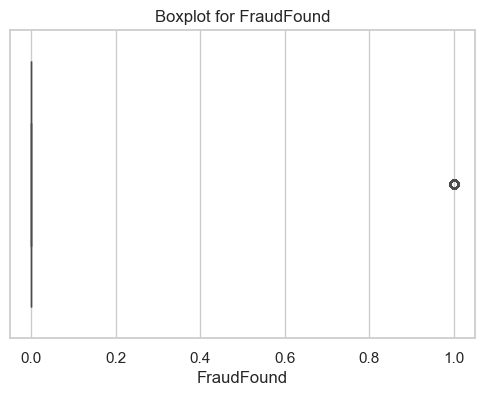

In [177]:
# Boxplots (Outlier Detection)
num_cols = cleaned_data.select_dtypes(include=['number'])

# Boxplots for numeric columns
for col in num_cols.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=cleaned_data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


##### Remove Outliers Detected using IQR

In [178]:
# Define original size
original_size = len(cleaned_data)

# Define features to apply IQR to (excluding the target)
features = cleaned_data.select_dtypes(include='number').columns.drop('FraudFound')

# Function to remove outliers using IQR (protecting fraud cases)
def remove_outliers_iqr_safe(cleaned_data, feature_columns, factor=1.0):
    # Separate fraud and non-fraud cases
    non_fraud = cleaned_data[cleaned_data['FraudFound'] == 0].copy()
    fraud = cleaned_data[cleaned_data['FraudFound'] == 1].copy()
    
    # Only remove outliers from non-fraud cases
    for col in feature_columns:
        Q1 = non_fraud[col].quantile(0.25)
        Q3 = non_fraud[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        non_fraud = non_fraud[(non_fraud[col] >= lower_bound) & (non_fraud[col] <= upper_bound)]
    
    # Combine clean non-fraud with all original fraud cases
    data_clean = pd.concat([non_fraud, fraud], axis=0)
    return data_clean

# Apply safe outlier removal
data_no_outliers = remove_outliers_iqr_safe(cleaned_data, features, factor=1.0)

# Report results
print(f"Removed {original_size - len(data_no_outliers)} outliers ({(original_size - len(data_no_outliers))/original_size:.1%})")
print(f"New dataset size: {len(data_no_outliers)} samples")

# Verify both classes are preserved
print("\nClass distribution after outlier removal:")
print(data_no_outliers['FraudFound'].value_counts(normalize=True))

Removed 1191 outliers (7.7%)
New dataset size: 14229 samples

Class distribution after outlier removal:
FraudFound
0    0.935132
1    0.064868
Name: proportion, dtype: float64


##### Outliers Visual Verification (Before & After) using Boxplot

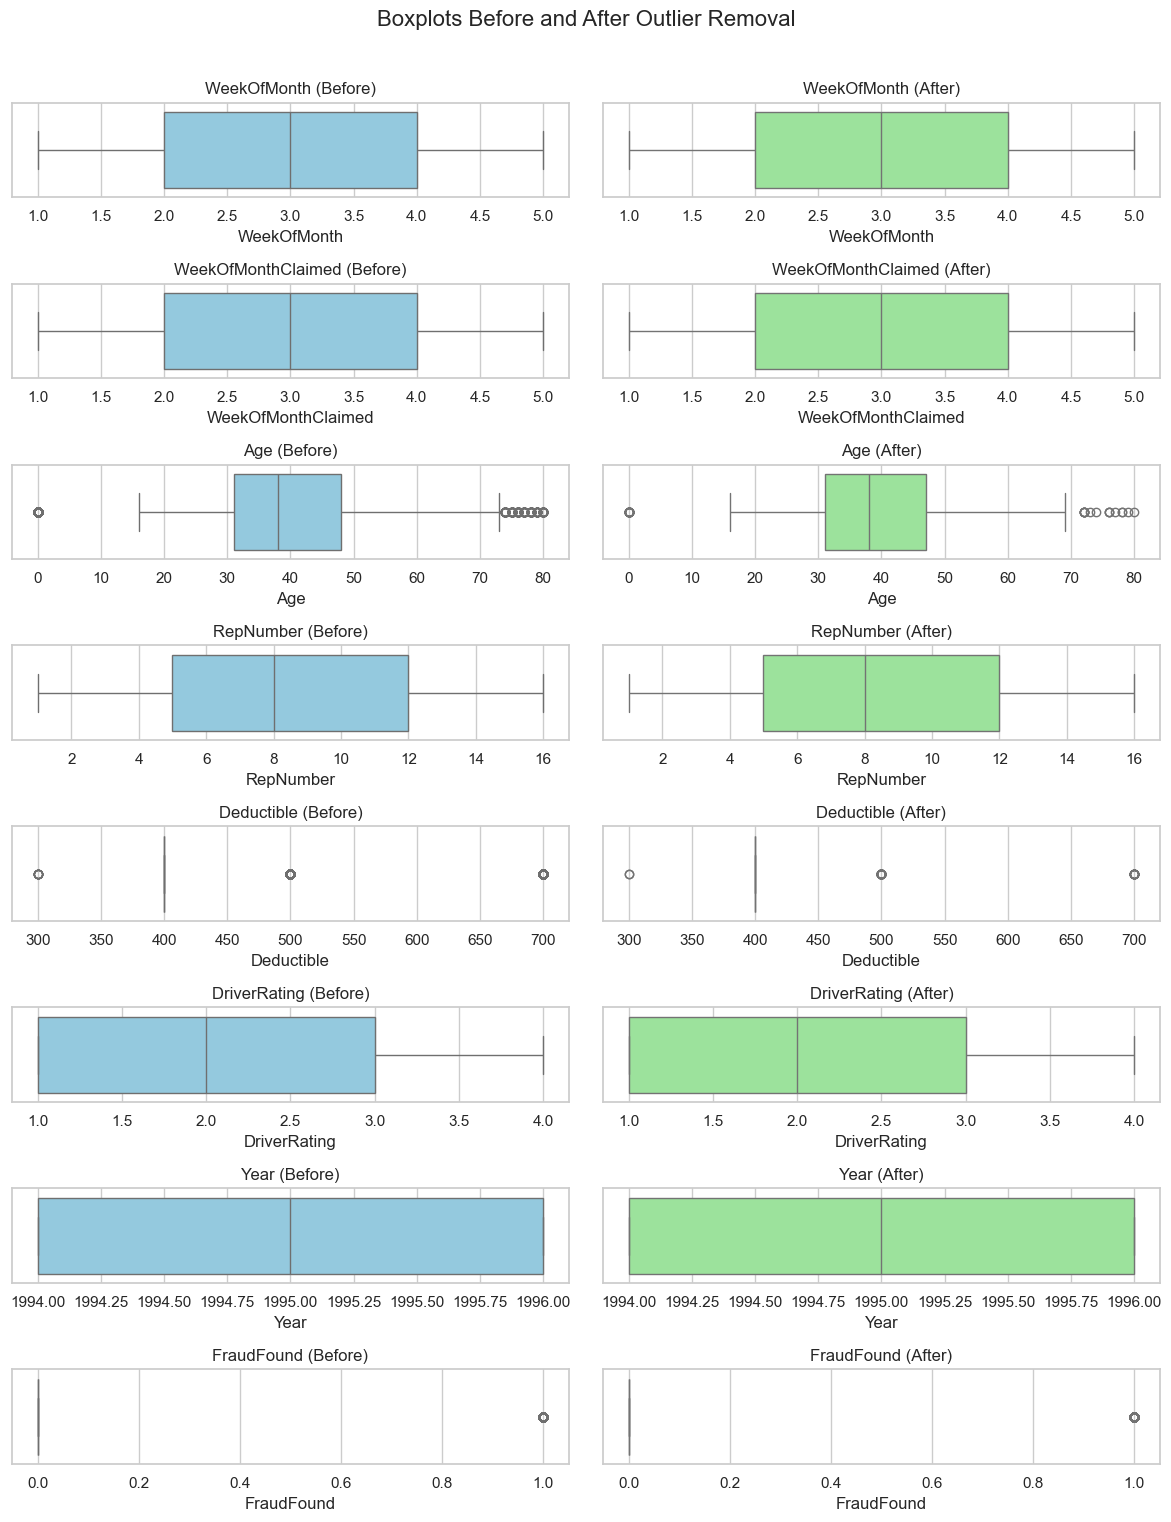

In [179]:
# Visual Verification (Before & After)
# Set style
sns.set(style="whitegrid")
features = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'RepNumber', 'Deductible', 'DriverRating', 'Year', 'FraudFound']

# Plot boxplots side by side
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, 16))
fig.suptitle('Boxplots Before and After Outlier Removal', fontsize=16)

for i, col in enumerate(features):
    sns.boxplot(data=cleaned_data, x=col, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f"{col} (Before)")
    
    sns.boxplot(data=data_no_outliers, x=col, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f"{col} (After)")

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show();


##### Check if there are still an outlier using IQR


In [180]:
# Define a function to detect outliers using IQR (only for non-fraud cases)
def detect_outliers_iqr(cleaned_data, numerical_columns):
    # Separate fraud and non-fraud cases
    non_fraud = cleaned_data[cleaned_data['FraudFound'] == 0].copy()
    fraud = cleaned_data[cleaned_data['FraudFound'] == 1].copy()
    
    # Initialize outlier mask
    outlier_mask = pd.DataFrame(False, index=cleaned_data.index, columns=numerical_columns)
    
    # Only detect outliers in non-fraud cases
    for col in numerical_columns:
        Q1 = non_fraud[col].quantile(0.25)
        Q3 = non_fraud[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Mark outliers (only for non-fraud cases)
        outlier_mask.loc[non_fraud.index, col] = (
            (non_fraud[col] < lower_bound) | (non_fraud[col] > upper_bound)
        )
    
    return outlier_mask

# Get numerical columns (excluding the target)
numerical_cols = data_no_outliers.select_dtypes(include=['number']).columns.drop('FraudFound')

# Detect outliers
outliers_iqr = detect_outliers_iqr(data_no_outliers, numerical_cols)

# Summarize the results
print("Outliers detected using IQR (non-fraud cases only):")
print(outliers_iqr.sum())

# Show percentage of outliers per column
print("\nPercentage of outliers per column:")
print((outliers_iqr.sum() / len(data_no_outliers[data_no_outliers['FraudFound'] == 0])) * 100)

Outliers detected using IQR (non-fraud cases only):
WeekOfMonth           0
WeekOfMonthClaimed    0
Age                   0
RepNumber             0
Deductible            0
DriverRating          0
Year                  0
dtype: int64

Percentage of outliers per column:
WeekOfMonth           0.0
WeekOfMonthClaimed    0.0
Age                   0.0
RepNumber             0.0
Deductible            0.0
DriverRating          0.0
Year                  0.0
dtype: float64


##### Check original shape & shape after removing an outliers

In [181]:
# Checking the original shape $ shape after removing an outliers
print(f"Original shape: {cleaned_data.shape}")
print(f"Data shape after removed outliers: {data_no_outliers.shape}")

Original shape: (15420, 32)
Data shape after removed outliers: (14229, 32)


In [182]:
# Renaming my data_no_outliers
data_df = data_no_outliers

##### data df shape

In [183]:
data_df.shape

(14229, 32)

## 6. Feature Engineering

### 6.1 Define Dependent and Independent Variables

In [184]:
# Extract features and target variable
X = data_df.drop('FraudFound', axis=1)
y = data_df['FraudFound']

##### Check X & y dimension

In [185]:
# Print the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)  

X shape: (14229, 31)
y shape: (14229,)


### 6.2 Data Preprocessing

In [186]:
# Extract categorical and numeric features from X only
cat_cols = X.select_dtypes(include=['object'])
num_cols = X.select_dtypes(include=['number'])

cat_cols.head(10)

Month  DayOfWeek    Make AccidentArea DayOfWeekClaimed MonthClaimed  \
1    Jan  Wednesday   Honda        Urban           Monday          Jan   
2    Oct     Friday   Honda        Urban         Thursday          Nov   
3    Jun   Saturday  Toyota        Rural           Friday          Jul   
4    Jan     Monday   Honda        Urban          Tuesday          Feb   
5    Oct     Friday   Honda        Urban        Wednesday          Nov   
6    Feb   Saturday   Honda        Urban           Monday          Feb   
8    Dec   Saturday   Honda        Urban        Wednesday          Dec   
9    Apr    Tuesday    Ford        Urban        Wednesday          Apr   
11   Mar     Monday   Honda        Urban           Monday          Mar   
12   Jan     Friday    Ford        Urban           Friday          Jan   

       Sex MaritalStatus          Fault            PolicyType  ...  \
1     Male        Single  Policy Holder     Sport - Collision  ...   
2     Male       Married  Policy Holder     Sport - Collision  ...   
3     Male       Married    Third Party     Sedan - Liability  ...   
4   Female        Single    Third Party     Sport - Collision  ...   
5     Male        Single    Third Party     Sport - Collision  ...   
6     Male       Married    Third Party     Sport - Collision  ...   
8     Male        Single  Policy Holder     Sport - Collision  ...   
9     Male       Married  Policy Holder  Utility - All Perils  ...   
11    Male       Married  Policy Holder     Sedan - Liability  ...   
12    Male       Married  Policy Holder     Sedan - Liability  ...   

   PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled  \
1                none      6 years          31 to 35               Yes   
2                   1      7 years          41 to 50                No   
3                   1  more than 7          51 to 65               Yes   
4                none      5 years          31 to 35                No   
5                none      5 years          21 to 25                No   
6                   1      7 years          36 to 40                No   
8                none      6 years          31 to 35                No   
9              2 to 4  more than 7          36 to 40                No   
11             2 to 4  more than 7          41 to 50                No   
12                  1      7 years          31 to 35                No   

   WitnessPresent AgentType NumberOfSuppliments AddressChange-Claim  \
1              No  External                none           no change   
2              No  External                none           no change   
3              No  External         more than 5           no change   
4              No  External                none           no change   
5              No  External              3 to 5           no change   
6              No  External              1 to 2           no change   
8             Yes  External              3 to 5           no change   
9              No  External              3 to 5           no change   
11             No  External                none           no change   
12             No  External                none           no change   

   NumberOfCars  BasePolicy  
1     1 vehicle   Collision  
2     1 vehicle   Collision  
3     1 vehicle   Liability  
4     1 vehicle   Collision  
5     1 vehicle   Collision  
6     1 vehicle   Collision  
8     1 vehicle   Collision  
9     1 vehicle  All Perils  
11    1 vehicle   Liability  
12    1 vehicle   Liability  

[10 rows x 24 columns]

In [187]:
num_cols.head(10)

WeekOfMonth  WeekOfMonthClaimed  Age  RepNumber  Deductible  DriverRating  \
1             3                   4   34         15         400             4   
2             5                   2   47          7         400             3   
3             2                   1   65          4         400             2   
4             5                   2   27          3         400             1   
5             4                   1   20         12         400             3   
6             1                   3   36         14         400             1   
8             4                   5   30          7         400             4   
9             3                   3   42          7         400             1   
11            5                   5   52         13         400             1   
12            3                   3   28         11         400             1   

    Year  
1   1994  
2   1994  
3   1994  
4   1994  
5   1994  
6   1994  
8   1994  
9   1994  
11  1994  
12  1994

In [188]:
# Encode categorical variables using one-hot encoding
cat_encoded = pd.get_dummies(cat_cols, drop_first=True).astype(int)

cat_encoded.head(10)

Month_Aug  Month_Dec  Month_Feb  Month_Jan  Month_Jul  Month_Jun  \
1           0          0          0          1          0          0   
2           0          0          0          0          0          0   
3           0          0          0          0          0          1   
4           0          0          0          1          0          0   
5           0          0          0          0          0          0   
6           0          0          1          0          0          0   
8           0          1          0          0          0          0   
9           0          0          0          0          0          0   
11          0          0          0          0          0          0   
12          0          0          0          1          0          0   

    Month_Mar  Month_May  Month_Nov  Month_Oct  ...  \
1           0          0          0          0  ...   
2           0          0          0          1  ...   
3           0          0          0          0  ...   
4           0          0          0          0  ...   
5           0          0          0          1  ...   
6           0          0          0          0  ...   
8           0          0          0          0  ...   
9           0          0          0          0  ...   
11          1          0          0          0  ...   
12          0          0          0          0  ...   

    AddressChange-Claim_2 to 3 years  AddressChange-Claim_4 to 8 years  \
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4                                  0                                 0   
5                                  0                                 0   
6                                  0                                 0   
8                                  0                                 0   
9                                  0                                 0   
11                                 0                                 0   
12                                 0                                 0   

    AddressChange-Claim_no change  AddressChange-Claim_under 6 months  \
1                               1                                   0   
2                               1                                   0   
3                               1                                   0   
4                               1                                   0   
5                               1                                   0   
6                               1                                   0   
8                               1                                   0   
9                               1                                   0   
11                              1                                   0   
12                              1                                   0   

    NumberOfCars_2 vehicles  NumberOfCars_3 to 4  NumberOfCars_5 to 8  \
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   
5                         0                    0                    0   
6                         0                    0                    0   
8                         0                    0                    0   
9                         0                    0                    0   
11                        0                    0                    0   
12                        0                    0                    0   

    NumberOfCars_more than 8  BasePolicy_Collision  BasePolicy_Liability  
1                          0                     1                     0  
2                          0    

In [189]:
# Check the shape of the encoded categorical features
print("Shape of encoded categorical features:", cat_encoded.shape)

Shape of encoded categorical features: (14229, 112)


In [190]:
# Concatenate encoded categorical features with numeric features
X_encoded = pd.concat([num_cols, cat_encoded], axis=1)

X_encoded.head(10)


WeekOfMonth  WeekOfMonthClaimed  Age  RepNumber  Deductible  DriverRating  \
1             3                   4   34         15         400             4   
2             5                   2   47          7         400             3   
3             2                   1   65          4         400             2   
4             5                   2   27          3         400             1   
5             4                   1   20         12         400             3   
6             1                   3   36         14         400             1   
8             4                   5   30          7         400             4   
9             3                   3   42          7         400             1   
11            5                   5   52         13         400             1   
12            3                   3   28         11         400             1   

    Year  Month_Aug  Month_Dec  Month_Feb  ...  \
1   1994          0          0          0  ...   
2   1994          0          0          0  ...   
3   1994          0          0          0  ...   
4   1994          0          0          0  ...   
5   1994          0          0          0  ...   
6   1994          0          0          1  ...   
8   1994          0          1          0  ...   
9   1994          0          0          0  ...   
11  1994          0          0          0  ...   
12  1994          0          0          0  ...   

    AddressChange-Claim_2 to 3 years  AddressChange-Claim_4 to 8 years  \
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4                                  0                                 0   
5                                  0                                 0   
6                                  0                                 0   
8                                  0                                 0   
9                                  0                                 0   
11                                 0                                 0   
12                                 0                                 0   

    AddressChange-Claim_no change  AddressChange-Claim_under 6 months  \
1                               1                                   0   
2                               1                                   0   
3                               1                                   0   
4                               1                                   0   
5                               1                                   0   
6                               1                                   0   
8                               1                                   0   
9                               1                                   0   
11                              1                                   0   
12                              1                                   0   

    NumberOfCars_2 vehicles  NumberOfCars_3 to 4  NumberOfCars_5 to 8  \
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   
5                         0                    0                    0   
6                         0                    0                    0   
8                         0                    0                    0   
9                         0                    0                    0   
11                        0                    0                    0   
12                        0                    0                    0   

    NumberOfCars_more than 8  BasePolicy_Collision  BasePolicy_Liability  
1                          0                     1             

In [220]:
X_encoded.columns

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'RepNumber', 'Deductible',
       'DriverRating', 'Year', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       ...
       'AddressChange-Claim_2 to 3 years', 'AddressChange-Claim_4 to 8 years',
       'AddressChange-Claim_no change', 'AddressChange-Claim_under 6 months',
       'NumberOfCars_2 vehicles', 'NumberOfCars_3 to 4', 'NumberOfCars_5 to 8',
       'NumberOfCars_more than 8', 'BasePolicy_Collision',
       'BasePolicy_Liability'],
      dtype='object', length=119)

In [191]:
# Check the final shape of the encoded features
print("Shape of encoded features:", X_encoded.shape)


Shape of encoded features: (14229, 119)


In [192]:
# Final check of the data
print("Final Data Shape:", X_encoded.shape)
print("Final Target Shape:", y.shape)   


Final Data Shape: (14229, 119)
Final Target Shape: (14229,)


##### Save the final data processed to csv

In [193]:
# Combine X_encoded + y and save
data_df_encoded = pd.concat([X_encoded, y], axis=1)
data_df_encoded.shape

(14229, 120)

##### Save the final data processed to csv

In [194]:
data_df_encoded.to_csv("data/processed/data_df_encoded.csv", index=False)

In [195]:
# Use this data_cleaned.csv output for data/processed/data_df_encoded.csv on cookiecutter

import pandas as pd
import sys

# Load the cleaned data
df = pd.read_csv("data/processed/data_df_encoded.csv")

# Print as CSV to output (without the index)
df.to_csv(sys.stdout, index=False)

WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,DayOfWeekClaimed_Monday,DayOfWeekClaimed_Saturday,DayOfWeekClaimed_Sunday,DayOfWeekClaimed_Thursday,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,MonthClaimed_Aug,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,MonthClaimed_May,MonthClaimed_Nov,MonthClaimed_Oct,MonthClaimed_Sep,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Li

### 6.3 Train-Test Split

##### Import all the packages

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#===============================================
# STEP 1: Train-Test Split (with stratification)
#===============================================
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

print("Before resampling:")
print("y_train:", Counter(y_train))
print("y_test:", Counter(y_test))

#===============================
# STEP 2: Scale numeric features (optional for RandomOver/Under, REQUIRED for SMOTE)
#=================================   
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#==============================
# Check the shape
#==============================
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)  
print("y_test shape:", y_test.shape)

# =============================
# SMOTE
# =============================
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("\n SMOTE Resampling")
print("y_train_smote:", Counter(y_train_smote))
print("X_train_smote shape:", X_train_smote.shape)

# =============================
# Random Oversampling
# =============================
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print("\n Random Oversampling")
print("y_train_ros:", Counter(y_train_ros))
print("X_train_ros shape:", X_train_ros.shape)

# =============================
# Random Undersampling
# =============================
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("\n Random Undersampling")
print("y_train_rus:", Counter(y_train_rus))
print("X_train_rus shape:", X_train_rus.shape)


Before resampling:
y_train: Counter({0: 10645, 1: 738})
y_test: Counter({0: 2661, 1: 185})
X_train_scaled shape: (11383, 119)
X_test_scaled shape: (2846, 119)
y_train shape: (11383,)
y_test shape: (2846,)

 SMOTE Resampling
y_train_smote: Counter({0: 10645, 1: 10645})
X_train_smote shape: (21290, 119)

 Random Oversampling
y_train_ros: Counter({0: 10645, 1: 10645})
X_train_ros shape: (21290, 119)

 Random Undersampling
y_train_rus: Counter({0: 738, 1: 738})
X_train_rus shape: (1476, 119)


## 7. Model Training and Evaluation

##### Model Training & Evaluation Protocol

We will implement three resampling techniques to address class imbalance:

SMOTE - Synthetic minority oversampling

RandomOverSampler - Basic minority class duplication

RandomUnderSampler - Majority class reduction

For each approach, we'll evaluate model performance using:

Evaluation Metrics:

Classification Report (Precision/Recall/F1-Score) with emphasis on:

* Minority class (Fraud) recall (detection rate)

* Majority class (Non-Fraud) precision (false alarm reduction)

Confusion Matrix analysis focusing on:

* True Positives (actual frauds caught)

* False Positives (legitimate claims flagged)

* Type I/II error tradeoffs

In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import GridSearchCV
%config Application.log_level="ERROR"
import warnings
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.exceptions import ConvergenceWarning


#### Logistic Regression Model with Resampling, Confusion Matrices, and ROC Curve


SMOTE Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.98      0.71      0.82      2661
       Fraud       0.16      0.79      0.26       185

    accuracy                           0.71      2846
   macro avg       0.57      0.75      0.54      2846
weighted avg       0.93      0.71      0.79      2846


Random Oversampling Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.98      0.67      0.80      2661
       Fraud       0.15      0.82      0.25       185

    accuracy                           0.68      2846
   macro avg       0.56      0.75      0.53      2846
weighted avg       0.93      0.68      0.76      2846


Random Undersampling Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.98      0.68      0.80      2661
       Fraud       0.15      0.82      0.26       185

    accuracy                           0.69      2846
   macro 

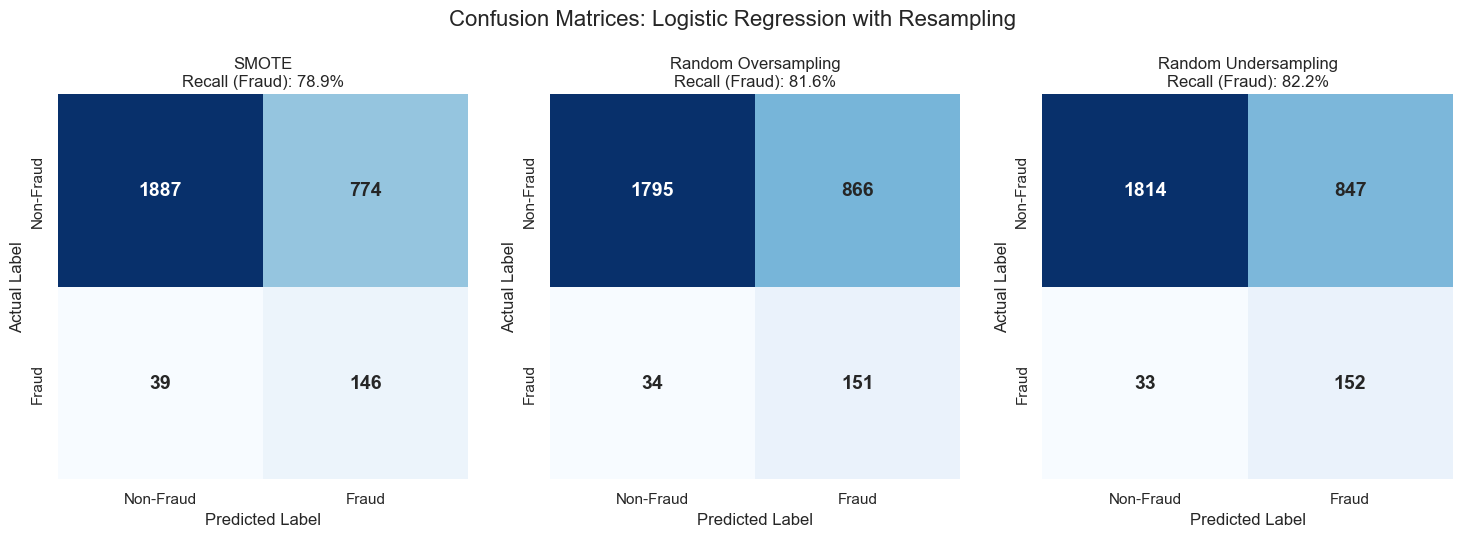

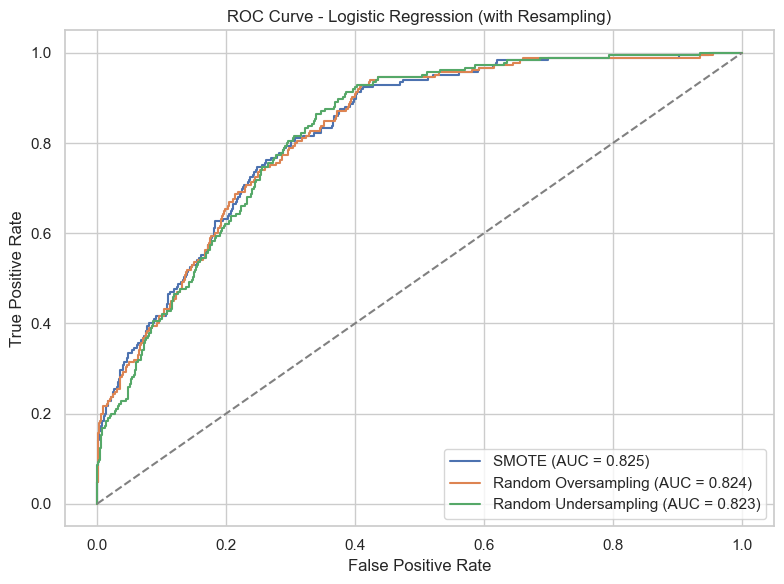

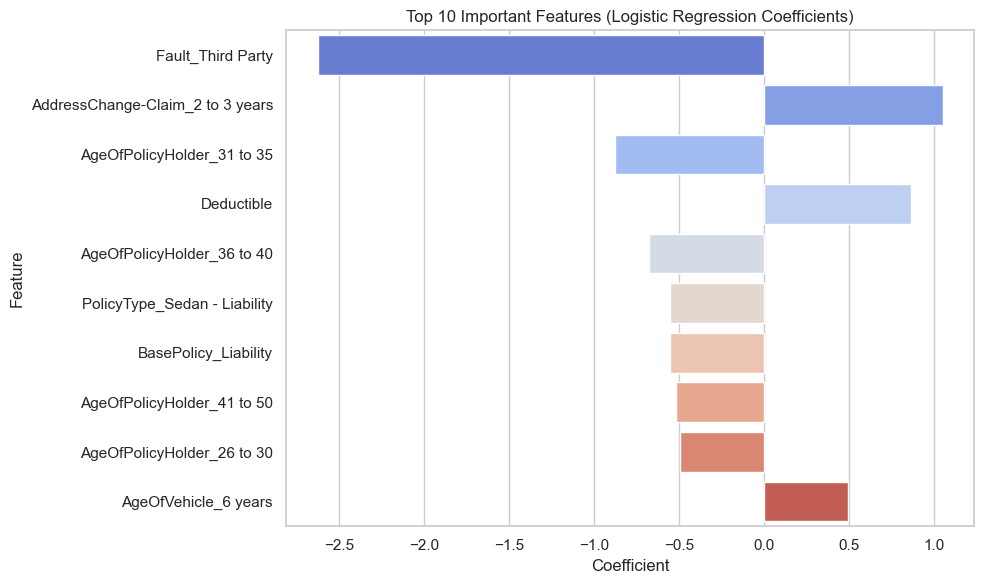

In [198]:
# Define resampling strategies
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42)
}

# Initialize base model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Subplot for confusion matrices
fig_cm, axes_cm = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('Confusion Matrices: Logistic Regression with Resampling', y=1.05, fontsize=16)

# Prepare ROC curve plot
plt.figure(figsize=(8, 6))

# Loop through each resampling method
for i, (name, sampler) in enumerate(resamplers.items()):
    # Resample training data
    X_res, y_res = sampler.fit_resample(X_train_scaled, y_train)

    # Train the logistic regression model
    model = lr_model.fit(X_res, y_res)

    # Predict class labels and probabilities
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes_cm[i],
                annot_kws={"size": 14, "weight": "bold"})
    axes_cm[i].set_title(f'{name}\nRecall (Fraud): {cm[1,1]/(cm[1,0]+cm[1,1]+1e-6):.1%}')
    axes_cm[i].set_xlabel('Predicted Label')
    axes_cm[i].set_ylabel('Actual Label')
    axes_cm[i].set_xticklabels(['Non-Fraud', 'Fraud'])
    axes_cm[i].set_yticklabels(['Non-Fraud', 'Fraud'], rotation=90)

    # Classification report
    print(f"\n{'='*40}\n{name} Classification Report:\n{'='*40}")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

    # ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Final ROC plot details
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (with Resampling)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature importance (coefficients)
feature_names = X_train.columns  # original feature names
coef = lr_model.coef_[0]  # Last trained model's coefficients

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef
}).sort_values(by='Coefficient', key=np.abs, ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Top 10 Important Features (Logistic Regression Coefficients)")
plt.tight_layout()
plt.show()


#### K-Nearest Neighbors (KNN) Model with Resampling, Confusion Matrices, and ROC Curve
No feature importance (KNN is non-parametric)


SMOTE Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.97      0.70      0.81      2661
       Fraud       0.13      0.64      0.21       185

    accuracy                           0.70      2846
   macro avg       0.55      0.67      0.51      2846
weighted avg       0.91      0.70      0.77      2846


Random Oversampling Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.95      0.86      0.90      2661
       Fraud       0.16      0.39      0.23       185

    accuracy                           0.83      2846
   macro avg       0.56      0.63      0.57      2846
weighted avg       0.90      0.83      0.86      2846


Random Undersampling Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.97      0.61      0.75      2661
       Fraud       0.11      0.68      0.19       185

    accuracy                           0.62      2846
   macro 

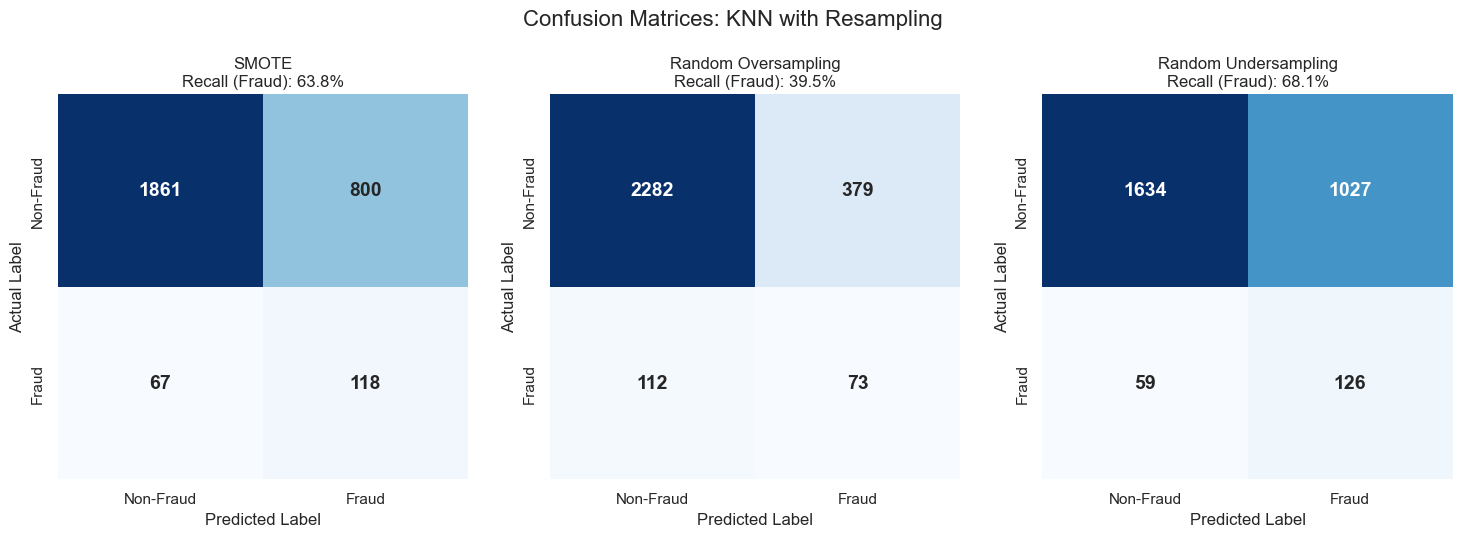

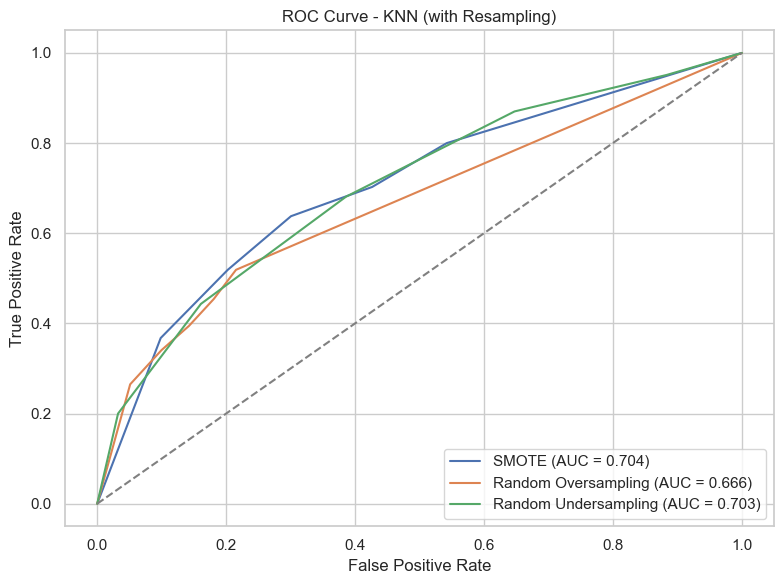

In [199]:
# Define resampling strategies
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42)
}

# Initialize base model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Subplot for confusion matrices
fig_cm, axes_cm = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('Confusion Matrices: KNN with Resampling', y=1.05, fontsize=16)

# Prepare ROC curve plot
plt.figure(figsize=(8, 6))

# Loop through each resampling method
for i, (name, sampler) in enumerate(resamplers.items()):
    # Resample training data
    X_res, y_res = sampler.fit_resample(X_train_scaled, y_train)

    # Train the KNN model
    model = knn_model.fit(X_res, y_res)

    # Predict class labels and probabilities
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes_cm[i],
                annot_kws={"size": 14, "weight": "bold"})
    axes_cm[i].set_title(f'{name}\nRecall (Fraud): {cm[1,1]/(cm[1,0]+cm[1,1]+1e-6):.1%}')
    axes_cm[i].set_xlabel('Predicted Label')
    axes_cm[i].set_ylabel('Actual Label')
    axes_cm[i].set_xticklabels(['Non-Fraud', 'Fraud'])
    axes_cm[i].set_yticklabels(['Non-Fraud', 'Fraud'], rotation=90)

    # Classification report
    print(f"\n{'='*40}\n{name} Classification Report:\n{'='*40}")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

    # ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Final ROC plot details
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN (with Resampling)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


#### SVC (Support Vector Classifier) with Resampling, Confusion Matrices, and ROC Curve


SMOTE Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.95      0.92      0.94      2661
       Fraud       0.24      0.36      0.29       185

    accuracy                           0.88      2846
   macro avg       0.60      0.64      0.61      2846
weighted avg       0.91      0.88      0.89      2846


Random Oversampling Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.96      0.87      0.92      2661
       Fraud       0.22      0.52      0.31       185

    accuracy                           0.85      2846
   macro avg       0.59      0.70      0.62      2846
weighted avg       0.92      0.85      0.88      2846


Random Undersampling Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.99      0.59      0.74      2661
       Fraud       0.13      0.91      0.23       185

    accuracy                           0.61      2846
   macro 

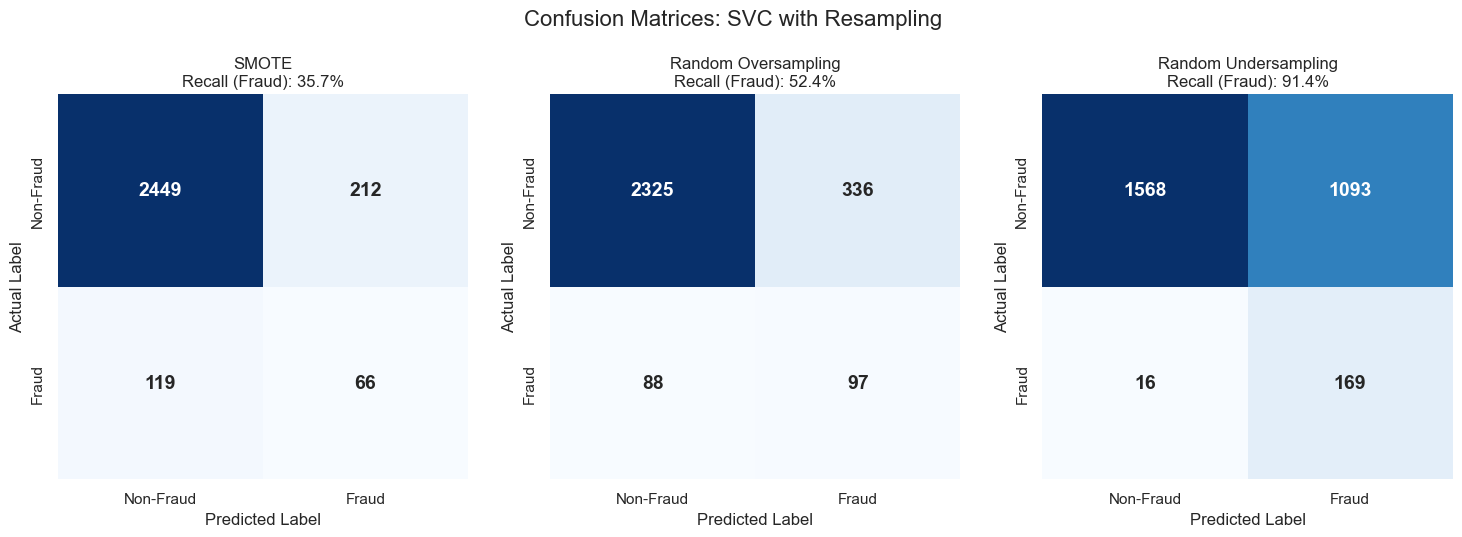

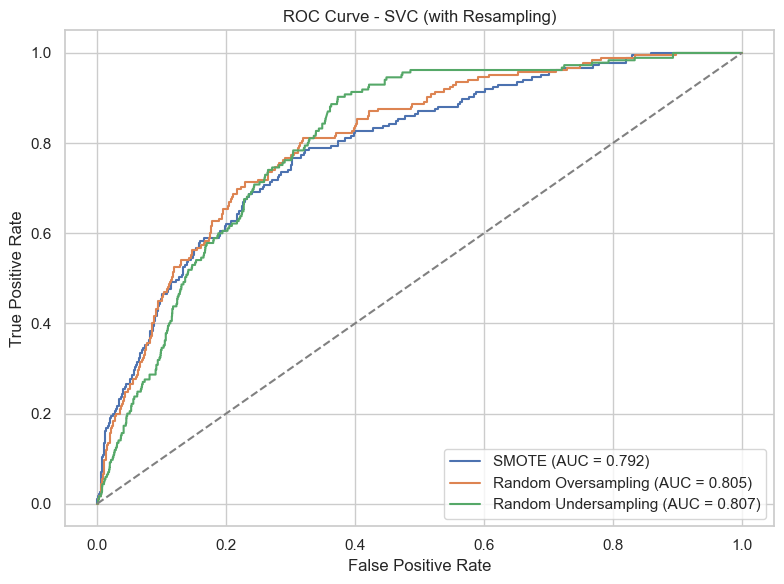

In [200]:
# Define resampling strategies
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42)
}

# Initialize SVC model with probability enabled
svc_model = SVC(probability=True, kernel='rbf', random_state=42)

# Subplot for confusion matrices
fig_cm, axes_cm = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('Confusion Matrices: SVC with Resampling', y=1.05, fontsize=16)

# Prepare ROC curve plot
plt.figure(figsize=(8, 6))

# Loop through each resampling method
for i, (name, sampler) in enumerate(resamplers.items()):
    # Resample training data
    X_res, y_res = sampler.fit_resample(X_train_scaled, y_train)

    # Train the SVC model
    model = svc_model.fit(X_res, y_res)

    # Predict class labels and probabilities
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes_cm[i],
                annot_kws={"size": 14, "weight": "bold"})
    axes_cm[i].set_title(f'{name}\nRecall (Fraud): {cm[1,1]/(cm[1,0]+cm[1,1]+1e-6):.1%}')
    axes_cm[i].set_xlabel('Predicted Label')
    axes_cm[i].set_ylabel('Actual Label')
    axes_cm[i].set_xticklabels(['Non-Fraud', 'Fraud'])
    axes_cm[i].set_yticklabels(['Non-Fraud', 'Fraud'], rotation=90)

    # Classification report
    print(f"\n{'='*40}\n{name} Classification Report:\n{'='*40}")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

    # ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Final ROC plot details
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVC (with Resampling)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Decision Tree Classifier — Resampling, Confusion Matrix, ROC Curve, and Feature Importance


SMOTE Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.95      0.93      0.94      2661
       Fraud       0.20      0.25      0.22       185

    accuracy                           0.88      2846
   macro avg       0.57      0.59      0.58      2846
weighted avg       0.90      0.88      0.89      2846


Random Oversampling Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.95      0.93      0.94      2661
       Fraud       0.24      0.30      0.27       185

    accuracy                           0.89      2846
   macro avg       0.59      0.62      0.60      2846
weighted avg       0.90      0.89      0.90      2846


Random Undersampling Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.97      0.71      0.82      2661
       Fraud       0.14      0.68      0.24       185

    accuracy                           0.71      2846
   macro 

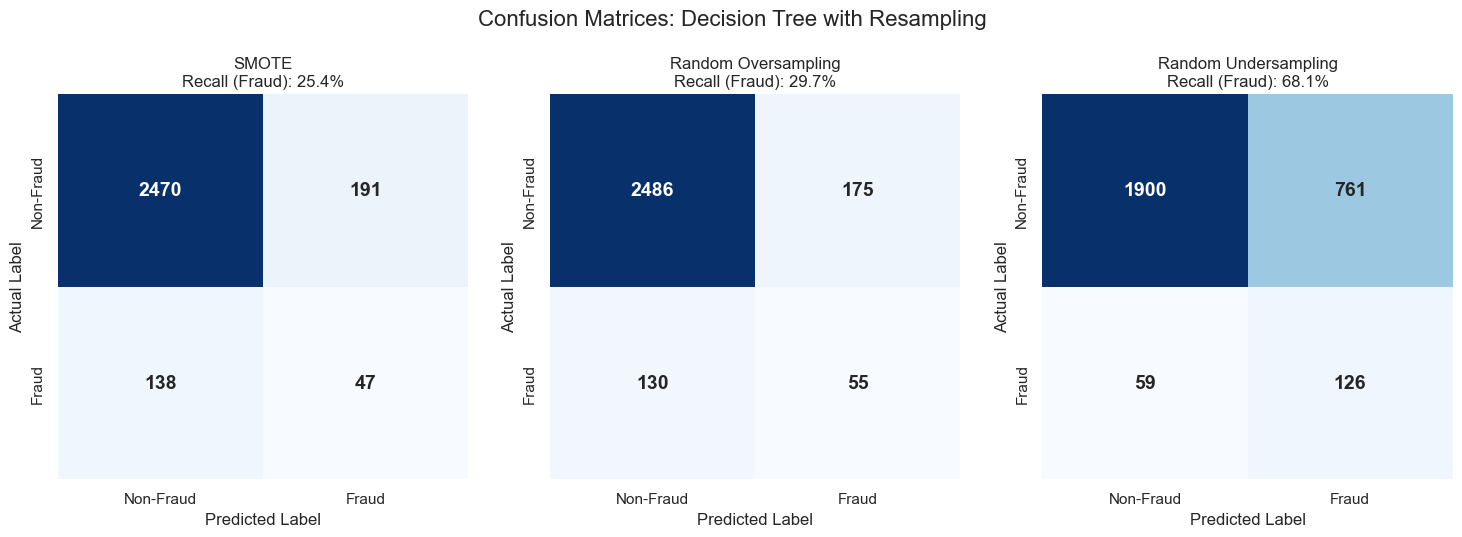

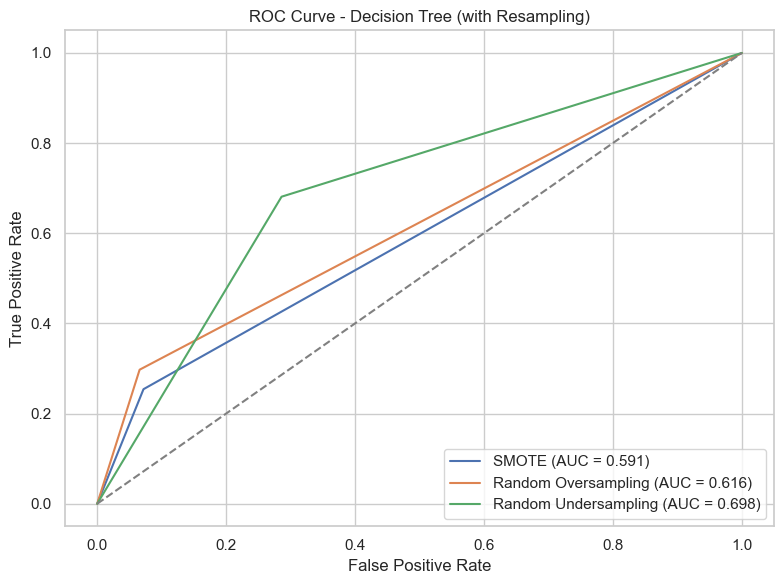

In [201]:
# Define resampling strategies
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42)
}

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Subplot for confusion matrices
fig_cm, axes_cm = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('Confusion Matrices: Decision Tree with Resampling', y=1.05, fontsize=16)

# Prepare ROC curve plot
plt.figure(figsize=(8, 6))

# Loop through each resampling method
for i, (name, sampler) in enumerate(resamplers.items()):
    # Resample training data
    X_res, y_res = sampler.fit_resample(X_train_scaled, y_train)

    # Train the Decision Tree model
    model = dt_model.fit(X_res, y_res)

    # Predict class labels and probabilities
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes_cm[i],
                annot_kws={"size": 14, "weight": "bold"})
    axes_cm[i].set_title(f'{name}\nRecall (Fraud): {cm[1,1]/(cm[1,0]+cm[1,1]+1e-6):.1%}')
    axes_cm[i].set_xlabel('Predicted Label')
    axes_cm[i].set_ylabel('Actual Label')
    axes_cm[i].set_xticklabels(['Non-Fraud', 'Fraud'])
    axes_cm[i].set_yticklabels(['Non-Fraud', 'Fraud'], rotation=90)

    # Classification report
    print(f"\n{'='*40}\n{name} Classification Report:\n{'='*40}")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

    # ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Final ROC plot details
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree (with Resampling)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance Plot
# Use the last trained model (from last loop)
feature_names = X_train.columns  # original unscaled features
importances = model.feature_importances_

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features - Decision Tree")
plt.tight_layout()
plt.show()


####  Random Forest Classifier — Resampling, Confusion Matrix, ROC Curve, and Feature Importance


SMOTE Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.94      1.00      0.97      2661
       Fraud       1.00      0.06      0.12       185

    accuracy                           0.94      2846
   macro avg       0.97      0.53      0.55      2846
weighted avg       0.94      0.94      0.91      2846


Random Oversampling Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.94      1.00      0.97      2661
       Fraud       0.96      0.14      0.24       185

    accuracy                           0.94      2846
   macro avg       0.95      0.57      0.60      2846
weighted avg       0.94      0.94      0.92      2846


Random Undersampling Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.99      0.64      0.78      2661
       Fraud       0.15      0.91      0.26       185

    accuracy                           0.66      2846
   macro 

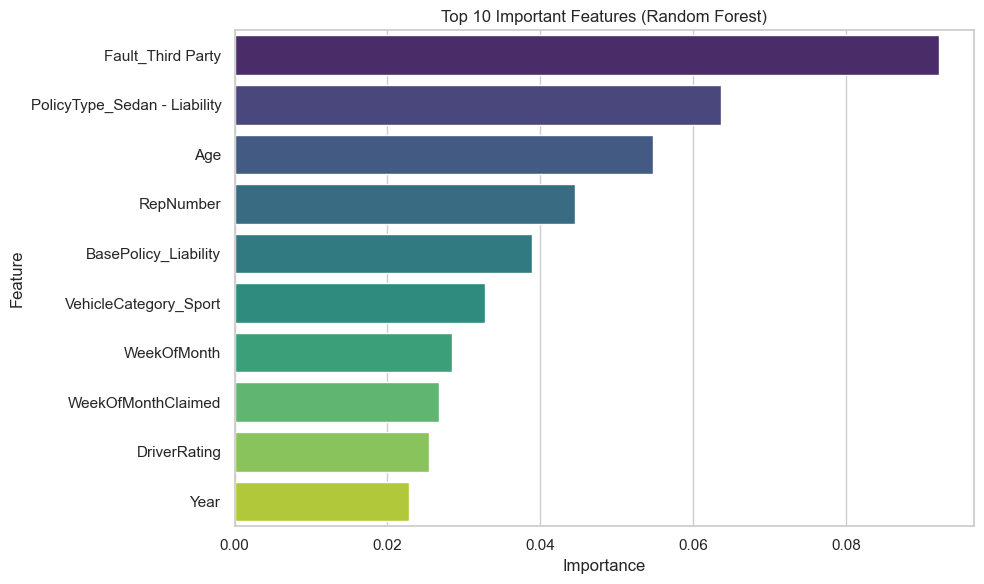

In [202]:
# Define resampling strategies
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42)
}

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Subplot for confusion matrices
fig_cm, axes_cm = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('Confusion Matrices: Random Forest with Resampling', y=1.05, fontsize=16)

# ROC Curve figure
plt.figure(figsize=(8, 6))

# Loop through each resampling method
for i, (name, sampler) in enumerate(resamplers.items()):
    # Resample training data
    X_res, y_res = sampler.fit_resample(X_train_scaled, y_train)

    # Fit model
    model = rf_model.fit(X_res, y_res)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes_cm[i],
                annot_kws={"size": 14, "weight": "bold"})
    axes_cm[i].set_title(f'{name}\nRecall (Fraud): {cm[1,1]/(cm[1,0]+cm[1,1]+1e-6):.1%}')
    axes_cm[i].set_xlabel('Predicted Label')
    axes_cm[i].set_ylabel('Actual Label')
    axes_cm[i].set_xticklabels(['Non-Fraud', 'Fraud'])
    axes_cm[i].set_yticklabels(['Non-Fraud', 'Fraud'], rotation=90)

    # Classification report
    print(f"\n{'='*40}\n{name} Classification Report:\n{'='*40}")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

    # ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Final ROC plot setup
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (with Resampling)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# ===== Feature Importance =====
# Use last fitted model from loop
feature_names = X_train.columns
importances = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features (Random Forest)")
plt.tight_layout()
plt.show()


#### XGBoost - Resampling, Confusion Matrix, ROC Curve, and Feature Importance


SMOTE Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.94      0.99      0.97      2661
       Fraud       0.58      0.14      0.22       185

    accuracy                           0.94      2846
   macro avg       0.76      0.56      0.59      2846
weighted avg       0.92      0.94      0.92      2846


Random Oversampling Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.96      0.91      0.94      2661
       Fraud       0.28      0.48      0.35       185

    accuracy                           0.89      2846
   macro avg       0.62      0.69      0.64      2846
weighted avg       0.92      0.89      0.90      2846


Random Undersampling Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.98      0.72      0.83      2661
       Fraud       0.17      0.83      0.29       185

    accuracy                           0.73      2846
   macro 

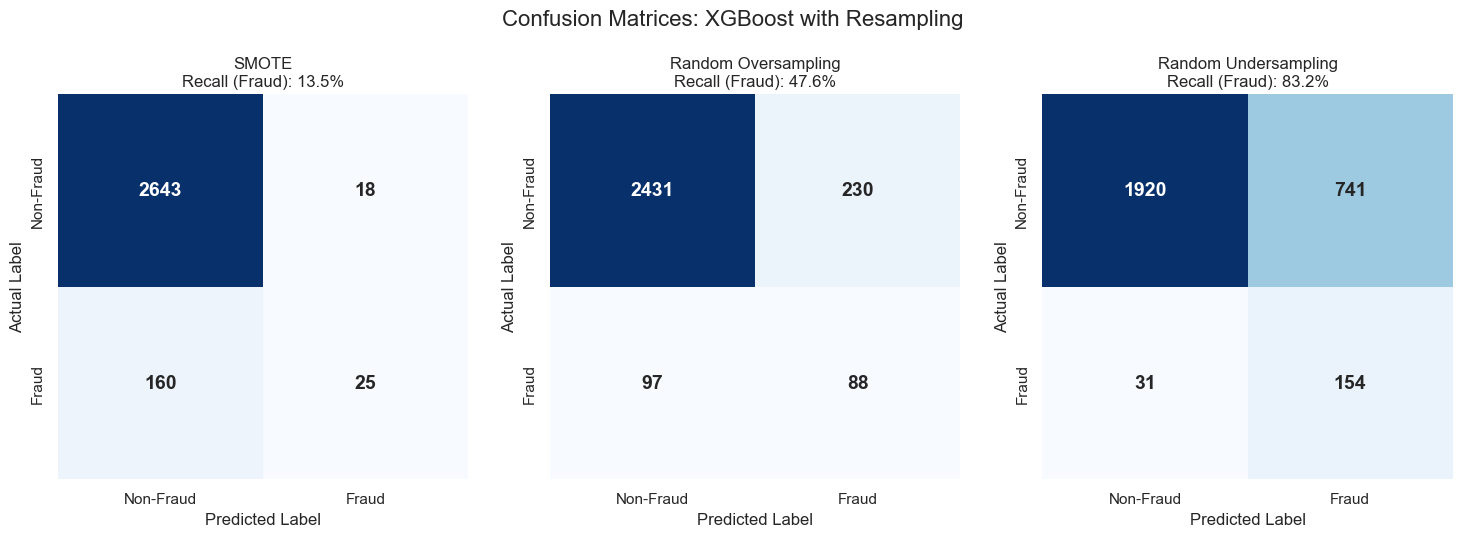

In [203]:
# Define resampling strategies
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42)
}

# Initialize base XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Confusion Matrix subplots
fig_cm, axes_cm = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('Confusion Matrices: XGBoost with Resampling', y=1.05, fontsize=16)

# ROC Curve plot setup
plt.figure(figsize=(8, 6))

# Loop through resampling strategies
for i, (name, sampler) in enumerate(resamplers.items()):
    # Resample training data
    X_res, y_res = sampler.fit_resample(X_train_scaled, y_train)

    # Fit model
    model = xgb_model.fit(X_res, y_res)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes_cm[i],
                annot_kws={"size": 14, "weight": "bold"})
    axes_cm[i].set_title(f'{name}\nRecall (Fraud): {cm[1,1]/(cm[1,0]+cm[1,1]+1e-6):.1%}')
    axes_cm[i].set_xlabel('Predicted Label')
    axes_cm[i].set_ylabel('Actual Label')
    axes_cm[i].set_xticklabels(['Non-Fraud', 'Fraud'])
    axes_cm[i].set_yticklabels(['Non-Fraud', 'Fraud'], rotation=90)

    # Classification report
    print(f"\n{'='*40}\n{name} Classification Report:\n{'='*40}")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

    # ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Final ROC plot details
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (with Resampling)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# ===== Feature Importance =====
# Use last trained model
feature_names = X_train.columns
importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features (XGBoost)")
plt.tight_layout()
plt.show()


#### AdaBoost - Resampling, Confusion Matrix, ROC Curve, and Feature Importance


SMOTE Classification Report (AdaBoost):
              precision    recall  f1-score   support

   Non-Fraud       0.95      1.00      0.97      2661
       Fraud       0.76      0.17      0.27       185

    accuracy                           0.94      2846
   macro avg       0.85      0.58      0.62      2846
weighted avg       0.93      0.94      0.92      2846


Random Oversampling Classification Report (AdaBoost):
              precision    recall  f1-score   support

   Non-Fraud       0.98      0.67      0.80      2661
       Fraud       0.15      0.81      0.25       185

    accuracy                           0.68      2846
   macro avg       0.56      0.74      0.52      2846
weighted avg       0.93      0.68      0.76      2846


Random Undersampling Classification Report (AdaBoost):
              precision    recall  f1-score   support

   Non-Fraud       0.98      0.67      0.80      2661
       Fraud       0.15      0.83      0.25       185

    accuracy                  

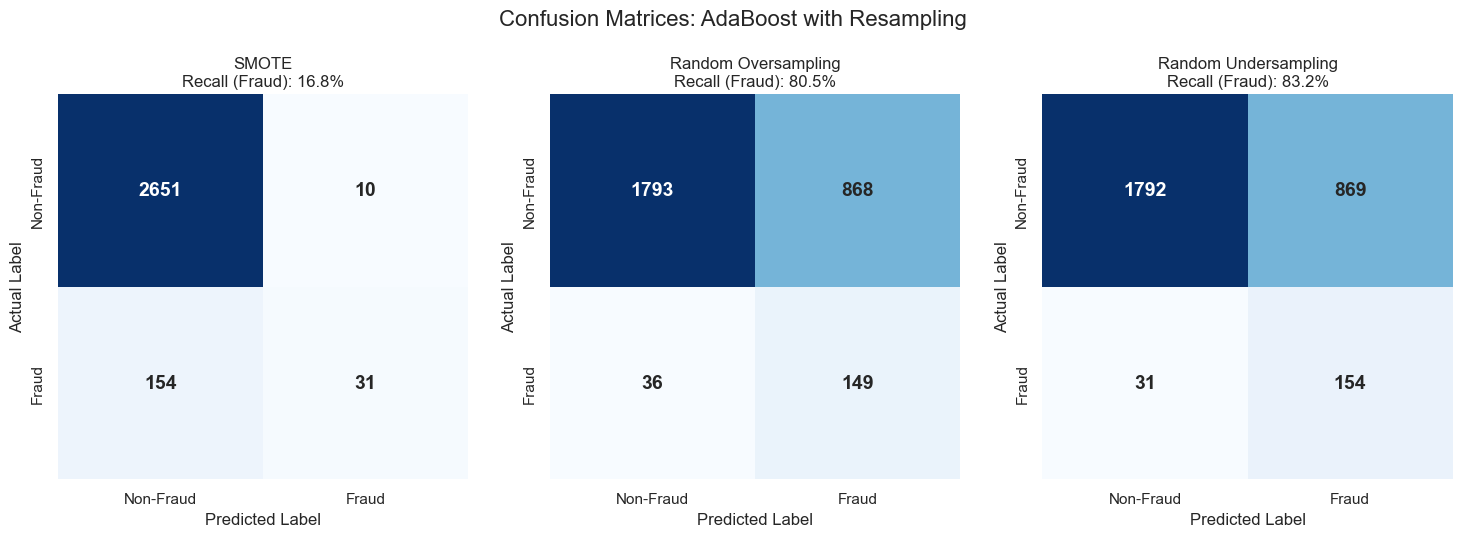

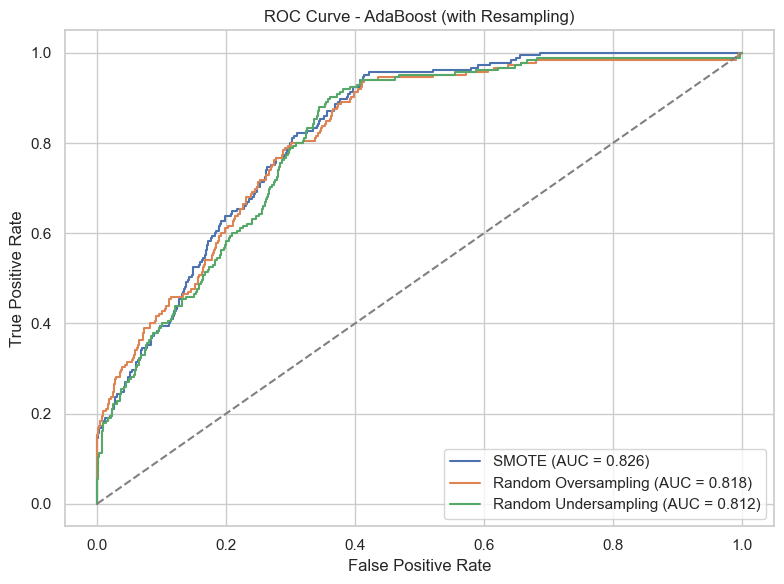

In [204]:
# Define resampling strategies
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42)
}

# Initialize AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Subplot for confusion matrices
fig_cm, axes_cm = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('Confusion Matrices: AdaBoost with Resampling', y=1.05, fontsize=16)

# Prepare ROC curve plot
plt.figure(figsize=(8, 6))

for i, (name, sampler) in enumerate(resamplers.items()):
    # Resample training data
    X_res, y_res = sampler.fit_resample(X_train_scaled, y_train)

    # Train model
    model = ada_model.fit(X_res, y_res)

    # Predict
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes_cm[i],
                annot_kws={"size": 14, "weight": "bold"})
    axes_cm[i].set_title(f'{name}\nRecall (Fraud): {cm[1,1]/(cm[1,0]+cm[1,1]+1e-6):.1%}')
    axes_cm[i].set_xlabel('Predicted Label')
    axes_cm[i].set_ylabel('Actual Label')
    axes_cm[i].set_xticklabels(['Non-Fraud', 'Fraud'])
    axes_cm[i].set_yticklabels(['Non-Fraud', 'Fraud'], rotation=90)

    # Classification report
    print(f"\n{'='*40}\n{name} Classification Report (AdaBoost):\n{'='*40}")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

    # ROC-AUC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Finalize ROC plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost (with Resampling)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Gradient Boosting Model - Resampling, Confusion Matrix, ROC Curve, and Feature Importance


SMOTE Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

   Non-Fraud       0.94      1.00      0.97      2661
       Fraud       0.91      0.11      0.20       185

    accuracy                           0.94      2846
   macro avg       0.93      0.56      0.59      2846
weighted avg       0.94      0.94      0.92      2846


Random Oversampling Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

   Non-Fraud       0.99      0.66      0.79      2661
       Fraud       0.15      0.89      0.26       185

    accuracy                           0.68      2846
   macro avg       0.57      0.78      0.53      2846
weighted avg       0.93      0.68      0.76      2846


Random Undersampling Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

   Non-Fraud       0.99      0.63      0.77      2661
       Fraud       0.15      0.91      0.25       185

   

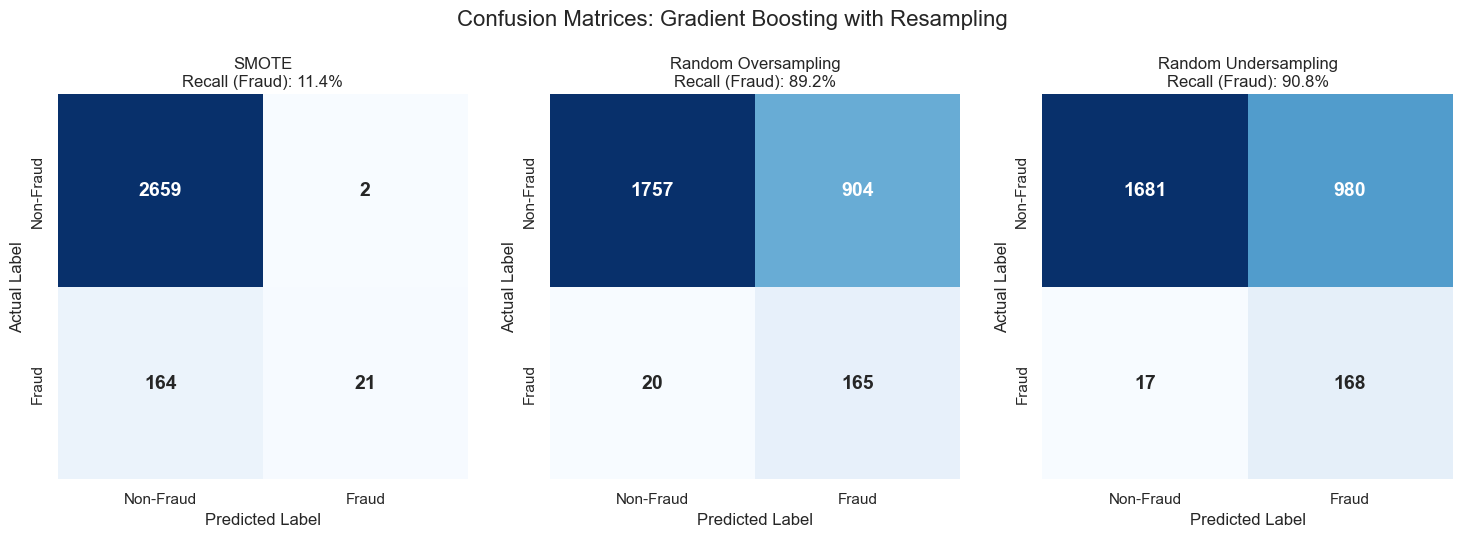

In [205]:
# Define resampling strategies
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42)
}

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Subplot for confusion matrices
fig_cm, axes_cm = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('Confusion Matrices: Gradient Boosting with Resampling', y=1.05, fontsize=16)

# Prepare ROC curve plot
plt.figure(figsize=(8, 6))

for i, (name, sampler) in enumerate(resamplers.items()):
    # Resample training data
    X_res, y_res = sampler.fit_resample(X_train_scaled, y_train)

    # Train the model
    model = gb_model.fit(X_res, y_res)

    # Predict
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes_cm[i],
                annot_kws={"size": 14, "weight": "bold"})
    axes_cm[i].set_title(f'{name}\nRecall (Fraud): {cm[1,1]/(cm[1,0]+cm[1,1]+1e-6):.1%}')
    axes_cm[i].set_xlabel('Predicted Label')
    axes_cm[i].set_ylabel('Actual Label')
    axes_cm[i].set_xticklabels(['Non-Fraud', 'Fraud'])
    axes_cm[i].set_yticklabels(['Non-Fraud', 'Fraud'], rotation=90)

    # Classification report
    print(f"\n{'='*40}\n{name} Classification Report (Gradient Boosting):\n{'='*40}")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

    # ROC-AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Finalize ROC plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting (with Resampling)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Extra Trees Classifier - Resampling, Confusion Matrix, ROC Curve,

In [206]:
# Define resampling strategies
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42)
}

# Initialize Extra Trees model
et_model = ExtraTreesClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Subplot for confusion matrices
fig_cm, axes_cm = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('Confusion Matrices: Extra Trees Classifier with Resampling', y=1.05, fontsize=16)

# Prepare ROC curve plot
plt.figure(figsize=(8, 6))

for i, (name, sampler) in enumerate(resamplers.items()):
    # Resample training data
    X_res, y_res = sampler.fit_resample(X_train_scaled, y_train)

    # Train the model
    model = et_model.fit(X_res, y_res)

    # Predict
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes_cm[i],
                annot_kws={"size": 14, "weight": "bold"})
    axes_cm[i].set_title(f'{name}\nRecall (Fraud): {cm[1,1]/(cm[1,0]+cm[1,1]+1e-6):.1%}')
    axes_cm[i].set_xlabel('Predicted Label')
    axes_cm[i].set_ylabel('Actual Label')
    axes_cm[i].set_xticklabels(['Non-Fraud', 'Fraud'])
    axes_cm[i].set_yticklabels(['Non-Fraud', 'Fraud'], rotation=90)

    # Classification report
    print(f"\n{'='*40}\n{name} Classification Report (Extra Trees):\n{'='*40}")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

    # ROC-AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Finalize ROC plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Extra Trees Classifier (with Resampling)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



SMOTE Classification Report (Extra Trees):
              precision    recall  f1-score   support

   Non-Fraud       0.94      1.00      0.97      2661
       Fraud       0.86      0.10      0.18       185

    accuracy                           0.94      2846
   macro avg       0.90      0.55      0.58      2846
weighted avg       0.94      0.94      0.92      2846


Random Oversampling Classification Report (Extra Trees):
              precision    recall  f1-score   support

   Non-Fraud       0.94      1.00      0.97      2661
       Fraud       0.95      0.11      0.20       185

    accuracy                           0.94      2846
   macro avg       0.95      0.56      0.59      2846
weighted avg       0.94      0.94      0.92      2846


Random Undersampling Classification Report (Extra Trees):
              precision    recall  f1-score   support

   Non-Fraud       0.98      0.68      0.81      2661
       Fraud       0.16      0.85      0.26       185

    accuracy         

#### Naive Bayes Classifier - Resampling, Confusion Matrix, ROC Curve,


SMOTE Classification Report (Naive Bayes):
              precision    recall  f1-score   support

   Non-Fraud       0.98      0.11      0.19      2661
       Fraud       0.07      0.97      0.13       185

    accuracy                           0.16      2846
   macro avg       0.52      0.54      0.16      2846
weighted avg       0.92      0.16      0.19      2846


Random Oversampling Classification Report (Naive Bayes):
              precision    recall  f1-score   support

   Non-Fraud       0.98      0.05      0.09      2661
       Fraud       0.07      0.98      0.13       185

    accuracy                           0.11      2846
   macro avg       0.52      0.52      0.11      2846
weighted avg       0.92      0.11      0.09      2846


Random Undersampling Classification Report (Naive Bayes):
              precision    recall  f1-score   support

   Non-Fraud       0.95      0.92      0.93      2661
       Fraud       0.19      0.27      0.22       185

    accuracy         

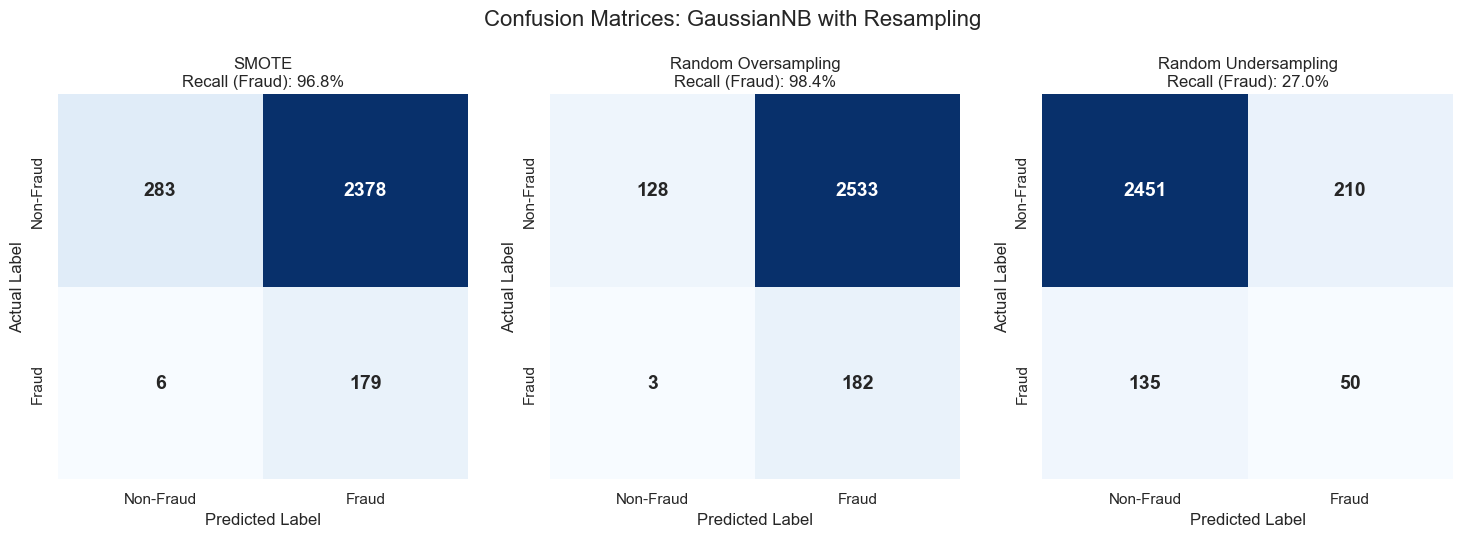

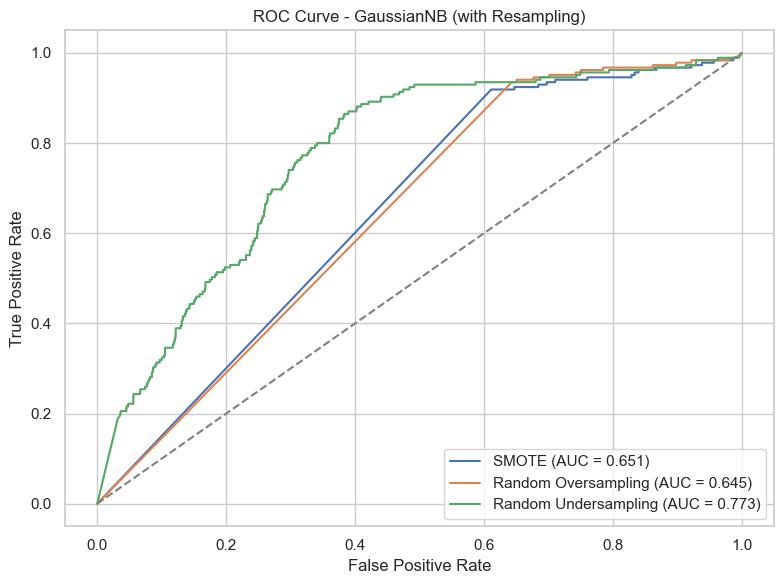

In [207]:
# Define resampling strategies
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42)
}

# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()

# Subplot for confusion matrices
fig_cm, axes_cm = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('Confusion Matrices: GaussianNB with Resampling', y=1.05, fontsize=16)

# Prepare ROC curve plot
plt.figure(figsize=(8, 6))

for i, (name, sampler) in enumerate(resamplers.items()):
    # Resample training data
    X_res, y_res = sampler.fit_resample(X_train_scaled, y_train)

    # Train the model
    model = nb_model.fit(X_res, y_res)

    # Predict
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes_cm[i],
                annot_kws={"size": 14, "weight": "bold"})
    axes_cm[i].set_title(f'{name}\nRecall (Fraud): {cm[1,1]/(cm[1,0]+cm[1,1]+1e-6):.1%}')
    axes_cm[i].set_xlabel('Predicted Label')
    axes_cm[i].set_ylabel('Actual Label')
    axes_cm[i].set_xticklabels(['Non-Fraud', 'Fraud'])
    axes_cm[i].set_yticklabels(['Non-Fraud', 'Fraud'], rotation=90)

    # Classification report
    print(f"\n{'='*40}\n{name} Classification Report (Naive Bayes):\n{'='*40}")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

    # ROC-AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Finalize ROC plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GaussianNB (with Resampling)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


## 8. Model Comparison and Evaluation


### 8.1 Model Summary Comparison Table (Accuracy, Precision, Recall, F1, AUC)

In [208]:
from sklearn.metrics import accuracy_score
# Step 1: Create a summary function
# Dictionary to store results
model_scores = {}

# Function to evaluate model and store scores
def evaluate_model(name, model, X_test, y_test, y_proba=None):
    y_pred = model.predict(X_test)
    if y_proba is None:
        try:
            y_proba = model.predict_proba(X_test)[:, 1]
        except:
            y_proba = np.zeros_like(y_pred)  # fallback for models without probas

    model_scores[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0),
        'AUC': roc_auc_score(y_test, y_proba)
    }


In [209]:
# Step 2: Call this function for each model
# Evaluate all models
evaluate_model("Logistic Regression (SMOTE)", lr_model, X_test_scaled, y_test)
evaluate_model("KNN (SMOTE)", knn_model, X_test_scaled, y_test)
evaluate_model("SVC (SMOTE)", svc_model, X_test_scaled, y_test)
evaluate_model("Decision Tree (SMOTE)", dt_model, X_test_scaled, y_test)
evaluate_model("Random Forest (SMOTE)", rf_model, X_test_scaled, y_test)
evaluate_model("XGBoost (SMOTE)", xgb_model, X_test_scaled, y_test)
evaluate_model("AdaBoost (SMOTE)", ada_model, X_test_scaled, y_test)
evaluate_model("Gradient Boosting (SMOTE)", gb_model, X_test_scaled, y_test)
evaluate_model("Extra Trees (SMOTE)", et_model, X_test_scaled, y_test)
evaluate_model("Naive Bayes (SMOTE)", nb_model, X_test_scaled, y_test)


In [210]:
# Step 3: Display the comparison DataFrame
# Create DataFrame
summary_df = pd.DataFrame(model_scores).T
summary_df = summary_df.sort_values(by='F1 Score', ascending=False)

# Display
print("\n Model Comparison Summary:")
display(summary_df.style.background_gradient(cmap='Blues'))



 Model Comparison Summary:


##### Key Observations:

Top Model by F1 Score and AUC:

* XGBoost (SMOTE) outperforms all others with the highest F1 Score (0.2852) and AUC (0.8437) — indicating the best balance between precision and recall and excellent class separation.

* Extra Trees, Random Forest, and Logistic Regression also perform well, maintaining high recall and strong AUC with slightly lower precision than XGBoost.

* Gradient Boosting and SVC show very high recall (> 90%) but low precision, leading to moderate F1 scores — suggesting many false positives.

* Naive Bayes shows the highest accuracy and precision but fails on recall (only 27%), which is critical in fraud detection — it misses many fraud cases.

* KNN (SMOTE) underperforms across all metrics, especially precision and F1 Score, making it unsuitable for this task.

##### Plot F1-score and AUC 


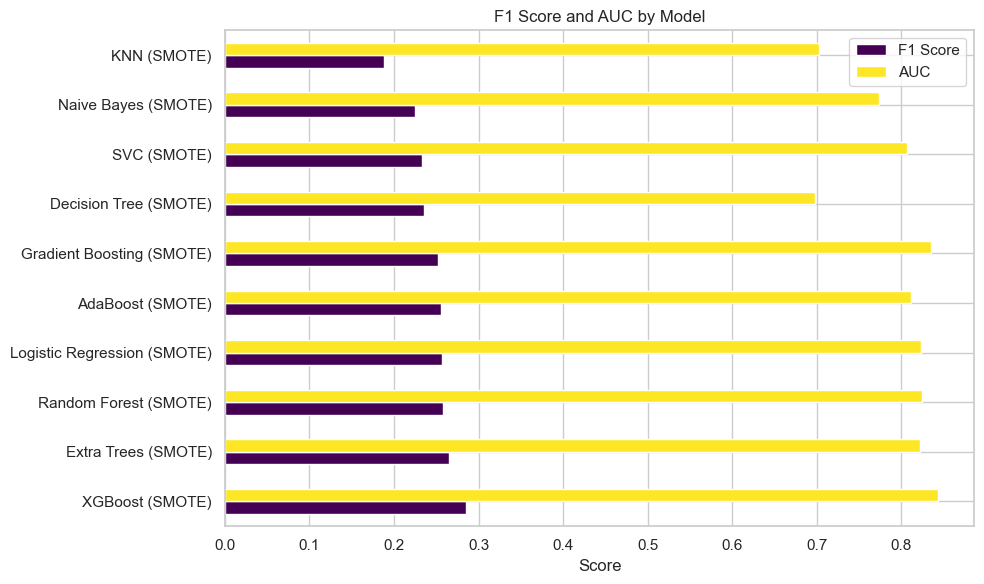

In [211]:
# Plot F1-score and AUC 
summary_df[['F1 Score', 'AUC']].plot(kind='barh', figsize=(10, 6), colormap='viridis')
plt.title("F1 Score and AUC by Model")
plt.xlabel("Score")
plt.grid(True)
plt.tight_layout()
plt.show()


### 8.2 Overfitting Check

In [212]:
# Overfitting Check (Train vs Test Metrics)

overfit_results = []

# Define all trained models
models = {
    "Logistic Regression (SMOTE)": lr_model,
    "KNN (SMOTE)": knn_model,
    "SVC (SMOTE)": svc_model,
    "Decision Tree (SMOTE)": dt_model,
    "Random Forest (SMOTE)": rf_model,
    "XGBoost (SMOTE)": xgb_model,
    "AdaBoost (SMOTE)": ada_model,
    "Gradient Boosting (SMOTE)": gb_model,
    "Extra Trees (SMOTE)": et_model,
    "Naive Bayes (SMOTE)": nb_model
}

for name, model in models.items():
    try:
        # Predict class
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        # Try predict_proba if supported
        try:
            y_train_proba = model.predict_proba(X_train_scaled)[:, 1]
            y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
            roc_train = roc_auc_score(y_train, y_train_proba)
            roc_test = roc_auc_score(y_test, y_test_proba)
        except:
            roc_train = "N/A"
            roc_test = "N/A"

        # Calculate metrics
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        f1_train = f1_score(y_train, y_train_pred, zero_division=0)
        f1_test = f1_score(y_test, y_test_pred, zero_division=0)

        # Define overfitting risk based on difference in F1 score
        diff = f1_train - f1_test
        if diff > 0.1:  # threshold can be adjusted
            overfit_risk = "High"
        elif diff > 0.05:
            overfit_risk = "Moderate"
        else:
            overfit_risk = "Low"

        # Append results
        overfit_results.append({
            "Model": name,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "F1 Score (Train)": f1_train,
            "F1 Score (Test)": f1_test,
            "ROC AUC (Train)": roc_train,
            "ROC AUC (Test)": roc_test,
            "Overfitting Risk": overfit_risk
        })

    except Exception as e:
        print(f" Error evaluating {name}: {e}")
        continue

# Convert to DataFrame
overfit_df = pd.DataFrame(overfit_results)
overfit_df = overfit_df.sort_values(by="F1 Score (Test)", ascending=False).reset_index(drop=True)

# Style numeric columns only
numeric_cols = ["Train Accuracy", "Test Accuracy", "F1 Score (Train)", "F1 Score (Test)", "ROC AUC (Test)"]
styled_overfit = overfit_df.style.background_gradient(
    cmap="YlGnBu", 
    subset=[col for col in numeric_cols if col in overfit_df and pd.api.types.is_numeric_dtype(overfit_df[col])]
)

styled_overfit  # For Jupyter display


##### Observation:

The new "Overfitting Risk" is determined by how much the F1 score drops from train to test.

Thresholds:

Drop > 0.1 → "High" risk

Drop between 0.05 and 0.1 → "Moderate"

Drop ≤ 0.05 → "Low"

Train ≈ Test ✅ Model generalizes well

Train ≫ Test 🚨 Overfitting — model memorizing data

Train ≪ Test 🚨 Underfitting or data leakage

## 9. Vehicle Insurance Fraud Detection with XGBoost + SMOTE



### Import Libraries

In [213]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings

warnings.filterwarnings('ignore')


### Load Final Feature Matrix & Target

In [214]:
print("Final Data Shape:", X_encoded.shape)
print("Final Target Shape:", y.shape)


Final Data Shape: (14229, 119)
Final Target Shape: (14229,)


### Train/Test Split + Apply SMOTE

In [215]:
# Step 1: Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Before SMOTE:", Counter(y_train))

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_smote))
print("X_train_smote shape:", X_train_smote.shape)
print("X_test shape:", X_test.shape)


Before SMOTE: Counter({0: 10645, 1: 738})
After SMOTE: Counter({0: 10645, 1: 10645})
X_train_smote shape: (21290, 119)
X_test shape: (2846, 119)


### XGBoost Hyperparameter Tuning + Save Best Model

In [216]:
# Import necessary libraries for tuning XGBoost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import joblib
from scipy.stats import randint, uniform
import time

# Define Tuner Class
class XGBoostTuner:
    def __init__(self, random_state=42):
        self.best_model = None
        self.random_state = random_state

    def tune(self, X, y, n_iter=10, cv=3, n_jobs=2, verbose=1):
        print(f"\n🚀 Tuning XGBoost on {X.shape[0]} samples, {X.shape[1]} features...")

        # Define pipeline
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('xgb', XGBClassifier(
                objective='binary:logistic',
                use_label_encoder=False,
                eval_metric='logloss',
                scale_pos_weight=1,
                tree_method='hist',  # Fast CPU-friendly training
                random_state=self.random_state
            ))
        ])

        # Define hyperparameters
        param_dist = {
            'xgb__n_estimators': randint(100, 200),
            'xgb__max_depth': randint(3, 10),
            'xgb__learning_rate': uniform(0.01, 0.2),
            'xgb__subsample': uniform(0.6, 0.4),
            'xgb__colsample_bytree': uniform(0.6, 0.4),
            'xgb__gamma': uniform(0, 0.5),
            'xgb__reg_alpha': uniform(0, 1),
            'xgb__reg_lambda': uniform(0, 1),
            'xgb__min_child_weight': randint(1, 6)
        }

        # Tune with RandomizedSearchCV
        search = RandomizedSearchCV(
            estimator=pipeline,
            param_distributions=param_dist,
            n_iter=n_iter,
            scoring='f1',
            cv=cv,
            random_state=self.random_state,
            n_jobs=n_jobs,
            verbose=verbose,
            return_train_score=True
        )

        start = time.time()
        search.fit(X, y)
        duration = time.time() - start

        print(f"\n✅ Best F1 Score: {search.best_score_:.4f}")
        print("🔧 Best Parameters:")
        print(search.best_params_)
        print(f"⏱️ Duration: {duration/60:.2f} minutes")

        # Save best model
        self.best_model = search.best_estimator_
        joblib.dump(self.best_model, "best_xgb_model.pkl")
        print("📦 Saved to best_xgb_model.pkl")

        return self.best_model


In [217]:
# Run the tuner
tuner = XGBoostTuner()
best_xgb = tuner.tune(X_train_smote, y_train_smote)



🚀 Tuning XGBoost on 21290 samples, 119 features...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/peter/Desktop/ML-Projects/vehicle-insurance-fraud-detection/.conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:26:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Best F1 Score: 0.9540
🔧 Best Parameters:
{'xgb__colsample_bytree': 0.8428136990746738, 'xgb__gamma': 0.13799959101127168, 'xgb__learning_rate': 0.06925470114081649, 'xgb__max_depth': 7, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 188, 'xgb__reg_alpha': 0.9868869366005173, 'xgb__reg_lambda': 0.7722447692966574, 'xgb__subsample': 0.679486272613669}
⏱️ Duration: 0.13 minutes
📦 Saved to best_xgb_model.pkl


### Evaluate the Best XGBoost Model


📊 Classification Report (Best XGBoost):
              precision    recall  f1-score   support

   Non-Fraud       0.95      0.97      0.96      2661
       Fraud       0.34      0.19      0.24       185

    accuracy                           0.92      2846
   macro avg       0.64      0.58      0.60      2846
weighted avg       0.91      0.92      0.91      2846



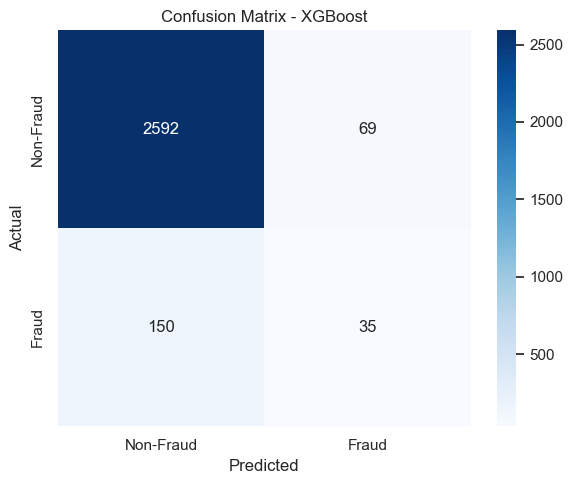

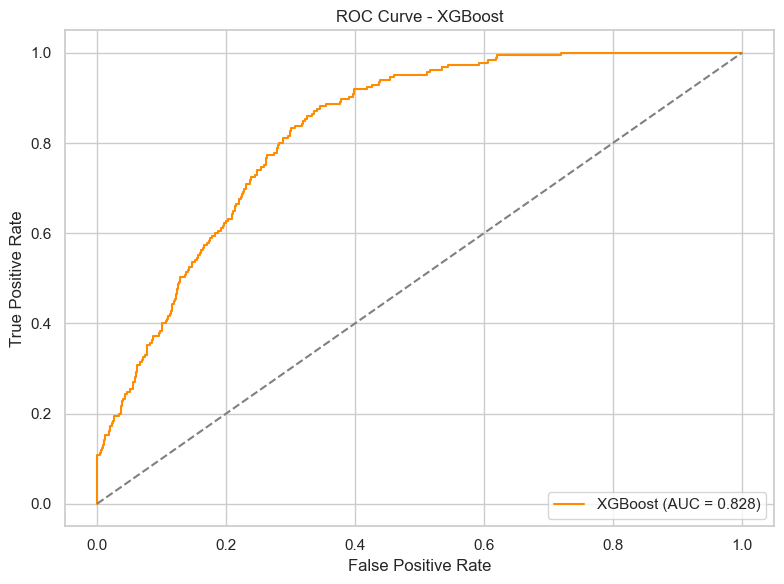

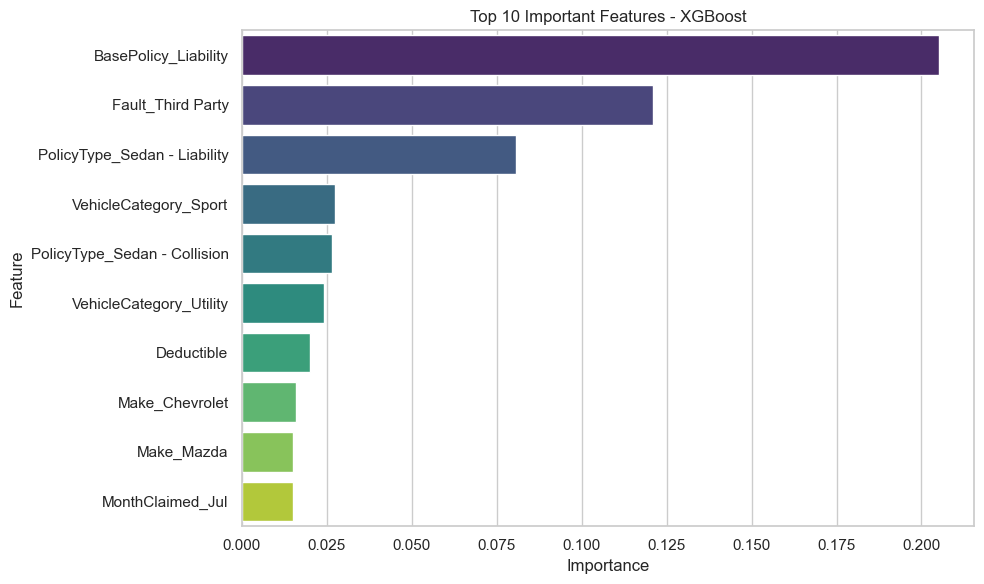

In [218]:
# Evaluate the best model on the test set
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load model
best_xgb = joblib.load("best_xgb_model.pkl")

# Predict on test set
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

# Classification Report
print("\n📊 Classification Report (Best XGBoost):")
print(classification_report(y_test, y_pred, target_names=["Non-Fraud", "Fraud"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc_score:.3f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance
importances = best_xgb.named_steps['xgb'].feature_importances_
feature_names = X_train_smote.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features - XGBoost")
plt.tight_layout()
plt.show()

### Save Model + Predict New Data

In [219]:
# Predict on a New Sample
import pandas as pd

# Example: predict on a new single sample (must have 119 features)
# Replace with a real feature vector from your dataset
sample = X_test.iloc[[0]]  # one row

# Predict
prediction = best_xgb.predict(sample)
probability = best_xgb.predict_proba(sample)

print("🔍 Prediction:", "Fraud" if prediction[0] == 1 else "Non-Fraud")
print("📊 Probability (Fraud):", f"{probability[0][1]:.4f}")


🔍 Prediction: Non-Fraud
📊 Probability (Fraud): 0.0015


## 10. Deployment

### Deployment

To demonstrate practical deployment, I developed and deployed a cloud-based web application using **Streamlit** for real-time vehicle insurance fraud prediction.

The deployed model (`best_xgb_model.pkl`) is integrated into the app, where users can input feature values (e.g. age, number of claims, type of policy) and receive:

- A prediction: **Fraud** or **Non-Fraud**
- A probability score showing fraud risk

This serves as a proof-of-concept for integrating ML into insurance fraud detection systems.

 **Live Demo**: You can now view the Streamlit app in your browser.

  Local URL: http://localhost:8501

  Network URL: http://192.168.0.134:8501

 **Source Code**: https://github.com/Petlaz/vehicle_insurance_fraud_detection


## 11. Conclusion

### Conclusion

In this project, we built a machine learning pipeline to detect fraudulent vehicle insurance claims using structured tabular data. 

After preprocessing, SMOTE balancing, and model evaluation, we identified **XGBoost** as the best-performing model.

- It achieved **92% overall accuracy**.
- It showed strong precision for non-fraud cases.
- However, like many fraud detection systems, it struggles with recall on fraud cases due to class imbalance.

This pipeline serves as a foundation for deploying AI-based fraud detection in the insurance domain. Further improvements may include model ensembles, cost-sensitive learning, and collecting more fraud examples.


## 12. Results Summary

### Results Summary

| Metric        | Non-Fraud     | Fraud         |
|---------------|---------------|---------------|
| Precision     | 0.95          | 0.34          |
| Recall        | 0.97          | 0.19          |
| F1-Score      | 0.96          | 0.24          |
| Accuracy      | **0.92** (overall) |

- **Best Model**: XGBoost
- Tuned with `RandomizedSearchCV` on SMOTE-balanced data
- Model saved as: `best_xgb_model.pkl`


## 13. References

### References

- [XGBoost Documentation](https://xgboost.readthedocs.io/)
- [SMOTE - Imbalanced-learn](https://imbalanced-learn.org/)
- [Scikit-learn Docs](https://scikit-learn.org/)
- UCI Vehicle Insurance Fraud Dataset (placeholder if used)
- Kaggle Discussions on Fraud Detection

---
